In [30]:

!pip install pandas matplotlib seaborn scikit-learn

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np
from scipy.stats import skew, kurtosis
from matplotlib.ticker import FuncFormatter
from sklearn.decomposition import PCA

## Load Datasets

In [32]:
traffic_data = pd.read_csv('traffic_data.csv')

# Data Preparation

In [33]:
# Display basic information
traffic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69888 entries, 0 to 69887
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   date                  69888 non-null  object 
 1   country               69888 non-null  object 
 2   device_category       69888 non-null  object 
 3   channel               69888 non-null  object 
 4   product               69888 non-null  object 
 5   users                 69888 non-null  int64  
 6   new_users             69888 non-null  int64  
 7   page_views            69888 non-null  int64  
 8   page_sessions         69888 non-null  float64
 9   sessions              69888 non-null  int64  
 10  session_duration      69888 non-null  float64
 11  avg_session_duration  69888 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 6.4+ MB


In [34]:


# Display summary statistics
traffic_data.describe(include='all')

,date,country,device_category,channel,product,users,new_users,page_views,page_sessions,sessions,session_duration,avg_session_duration
count,69888,69888,69888,69888,69888,6.988800e+04,69888.000000,6.988800e+04,69888.000000,6.988800e+04,6.988800e+04,69888
unique,484,214,5,12,1,NaN,NaN,NaN,NaN,NaN,NaN,29265
top,2024-02-27,Brazil,Mobile,Organic Search,todamateria.com.br,NaN,NaN,NaN,NaN,NaN,NaN,00:00:00
freq,601,7993,34328,39548,69888,NaN,NaN,NaN,NaN,NaN,NaN,7908
mean,NaN,NaN,NaN,NaN,NaN,5.400006e+03,1657.230226,7.396335e+03,1.402312,6.486829e+03,5.465966e+05,NaN
std,NaN,NaN,NaN,NaN,NaN,4.505479e+04,14275.866585,5.794222e+04,1.552405,5.461731e+04,4.333721e+06,NaN
min,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000,0.000000e+00,0.000000,1.000000e+00,0.000000e+00,NaN
25%,NaN,NaN,NaN,NaN,NaN,3.000000e+00,1.000000,4.000000e+00,1.000000,3.000000e+00,4.700000e+01,NaN
50%,NaN,NaN,NaN,NaN,NaN,5.100000e+01,14.000000,6.900000e+01,1.240000,5.850000e+01,3.494000e+03,NaN
75%,NaN,NaN,NaN,NaN,NaN,1.740000e+02,64.000000,2.690000e+02,1.600000,2.000000e+02,1.834425e+04,NaN


date: object (non-null, unique values: 484)
country: object (non-null, unique values: 214)
device_category: object (non-null, unique values: 5)
channel: object (non-null, unique values: 12)
product: object (non-null, unique values: 1)
users: int64 (non-null)
new_users: int64 (non-null)
page_views: int64 (non-null)
page_sessions: float64 (non-null)
sessions: int64 (non-null)
session_duration: float64 (non-null)
avg_session_duration: object (non-null, unique values: 29,265)

In [35]:
# Convert 'avg_session_duration' to timedelta format
traffic_data['avg_session_duration'] = pd.to_timedelta(traffic_data['avg_session_duration'])

# Convert 'date' to datetime format
traffic_data['date'] = pd.to_datetime(traffic_data['date'])

# Verify changes
info_after = traffic_data.info()
summary_after = traffic_data.describe(include='all')

print(info_after)
print(summary_after)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69888 entries, 0 to 69887
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype          
---  ------                --------------  -----          
 0   date                  69888 non-null  datetime64[ns] 
 1   country               69888 non-null  object         
 2   device_category       69888 non-null  object         
 3   channel               69888 non-null  object         
 4   product               69888 non-null  object         
 5   users                 69888 non-null  int64          
 6   new_users             69888 non-null  int64          
 7   page_views            69888 non-null  int64          
 8   page_sessions         69888 non-null  float64        
 9   sessions              69888 non-null  int64          
 10  session_duration      69888 non-null  float64        
 11  avg_session_duration  69888 non-null  timedelta64[ns]
dtypes: datetime64[ns](1), float64(2), int64(4), object(4), timed

C:\Users\User\AppData\Local\Temp\ipykernel_15260\4203764875.py:9: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  summary_after = traffic_data.describe(include='all')


In [36]:
# Display the first few rows of the dataset
traffic_data.head()

,date,country,device_category,channel,product,users,new_users,page_views,page_sessions,sessions,session_duration,avg_session_duration
0,2023-05-02,Angola,Mobile,Direct,todamateria.com.br,3191,457,4992,1.47,3389,221749.0,0 days 00:03:41.749000
1,2023-05-02,Brazil,Mobile,Direct,todamateria.com.br,45507,6245,55591,1.09,50787,3741629.0,0 days 01:02:21.629000
2,2023-05-02,Portugal,Mobile,Direct,todamateria.com.br,245,33,230,0.91,253,17696.0,0 days 00:00:17.696000
3,2023-05-02,Indonesia,Mobile,Direct,todamateria.com.br,76,14,107,1.27,84,5901.0,0 days 00:00:05.901000
4,2023-05-02,Cabo Verde,Mobile,Direct,todamateria.com.br,115,17,166,1.27,131,5113.0,0 days 00:00:05.113000


In [37]:
# Check for missing values
missing_values = traffic_data.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 date                    0
country                 0
device_category         0
channel                 0
product                 0
users                   0
new_users               0
page_views              0
page_sessions           0
sessions                0
session_duration        0
avg_session_duration    0
dtype: int64


In [38]:
# Check for zero values in each column
zero_values = (traffic_data == 0).sum()
print("Zero values in each column:\n", zero_values)


Zero values in each column:
 date                        0
country                     0
device_category             0
channel                     0
product                     0
users                      29
new_users               10212
page_views               2620
page_sessions            2647
sessions                    0
session_duration         7908
avg_session_duration        0
dtype: int64


In [39]:
# Check for duplicated rows
duplicated_rows = traffic_data.duplicated().sum()
print("Number of duplicated rows:", duplicated_rows)


Number of duplicated rows: 167


In [40]:
# Remove duplicated rows
traffic_data = traffic_data.drop_duplicates()

# Remove rows with zero values in 'page_sessions' and 'page_views'
traffic_data = traffic_data[(traffic_data['page_sessions'] != 0) & (traffic_data['page_views'] != 0)]

# Save the cleaned data into a new DataFrame
cleaned_traffic_data = traffic_data

cleaned_file_path = r'C:\Users\User\Desktop\7graus\cleaned_traffic_data.csv'

# Save the cleaned data to a CSV file
cleaned_traffic_data.to_csv(cleaned_file_path, index=False)


## Analyze seasonal trends in session duration

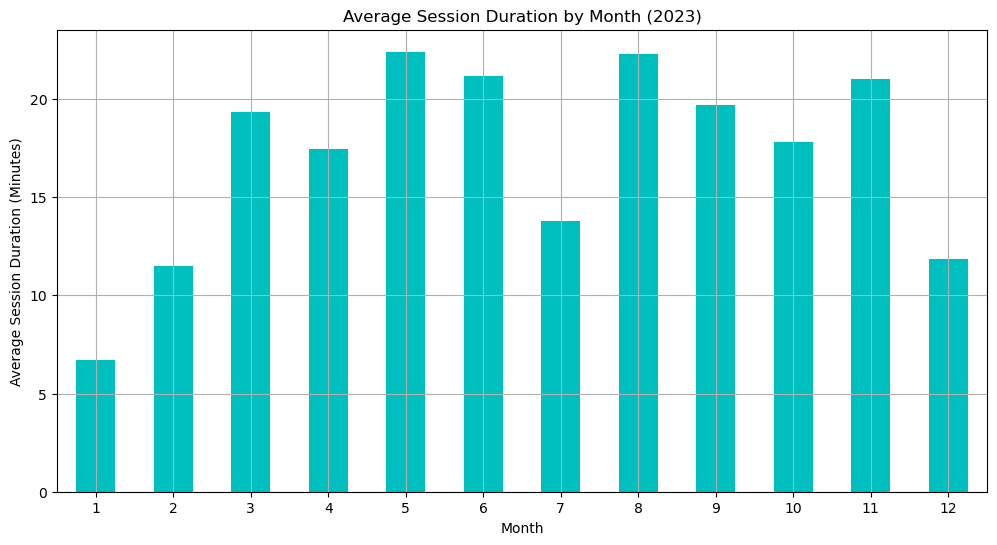

In [41]:
# Convert 'avg_session_duration' to timedelta format
traffic_data['avg_session_duration'] = pd.to_timedelta(traffic_data['avg_session_duration'])

# Convert 'date' to datetime format
traffic_data['date'] = pd.to_datetime(traffic_data['date'])

# Extract month from the date
traffic_data['month'] = traffic_data['date'].dt.month

# Filter data for the year 2023
data_2023 = traffic_data[traffic_data['date'].dt.year == 2023]

# Filter data for the year 2024
data_2024 = traffic_data[traffic_data['date'].dt.year == 2024]

# Aggregate the data by month for 2023
monthly_avg_duration_2023 = data_2023.groupby('month')['avg_session_duration'].mean()
monthly_avg_duration_2023_minutes = monthly_avg_duration_2023.dt.total_seconds() / 60

# Aggregate the data by month for 2024
monthly_avg_duration_2024 = data_2024.groupby('month')['avg_session_duration'].mean()
monthly_avg_duration_2024_minutes = monthly_avg_duration_2024.dt.total_seconds() / 60

# Plot the average session duration by month for 2023
plt.figure(figsize=(12, 6))
monthly_avg_duration_2023_minutes.plot(kind='bar', color='c')
plt.title('Average Session Duration by Month (2023)')
plt.xlabel('Month')
plt.ylabel('Average Session Duration (Minutes)')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

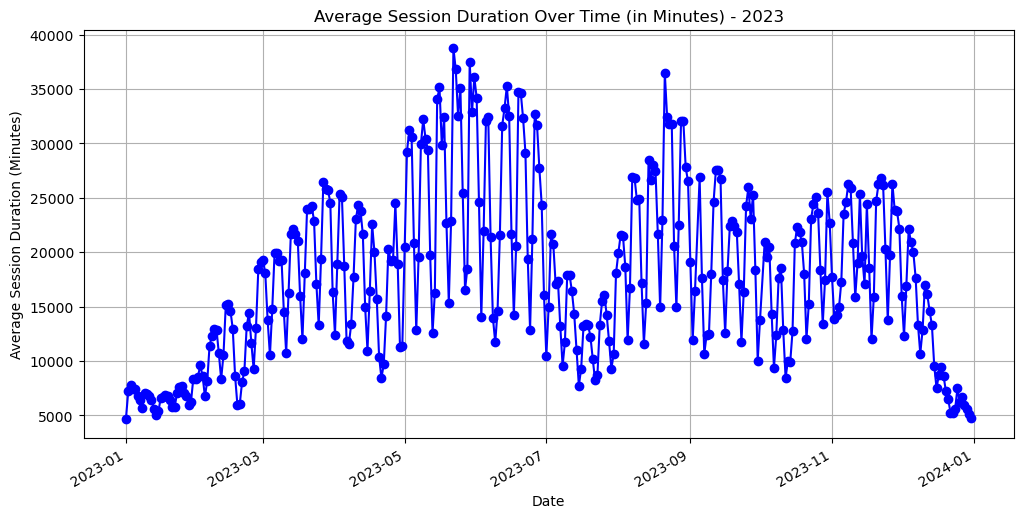

In [42]:
# Convert 'date' to datetime format
traffic_data['date'] = pd.to_datetime(traffic_data['date'])

# Filter data for the year 2023
data_2023 = traffic_data[traffic_data['date'].dt.year == 2023]

# Aggregate the data by date and calculate the average session duration for each day
daily_avg_duration_2023 = data_2023.groupby('date')['session_duration'].mean()

# Convert the average session duration from seconds to minutes
daily_avg_duration_2023_minutes = daily_avg_duration_2023 / 60

# Plot the time series
plt.figure(figsize=(12, 6))
daily_avg_duration_2023_minutes.plot(marker='o', linestyle='-', color='b')
plt.title('Average Session Duration Over Time (in Minutes) - 2023')
plt.xlabel('Date')
plt.ylabel('Average Session Duration (Minutes)')
plt.grid(True)
plt.show()

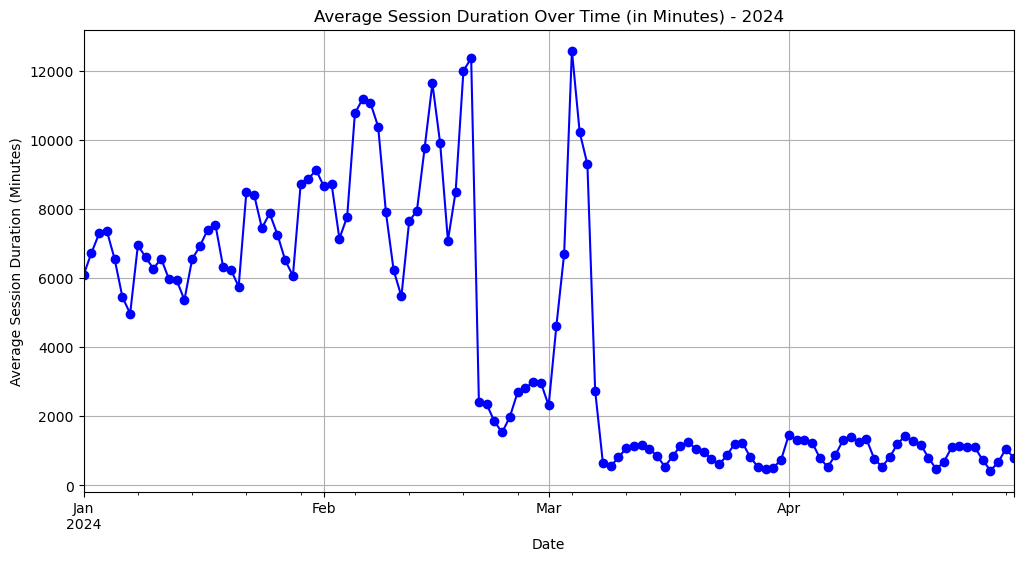

In [43]:

# Filter data for the year 2024
data_2024 = traffic_data[traffic_data['date'].dt.year == 2024]

# Aggregate the data by date and calculate the average session duration for each day
daily_avg_duration_2024 = data_2024.groupby('date')['session_duration'].mean()

# Convert the average session duration from seconds to minutes
daily_avg_duration_2024_minutes = daily_avg_duration_2024 / 60

# Plot the time series
plt.figure(figsize=(12, 6))
daily_avg_duration_2024_minutes.plot(marker='o', linestyle='-', color='b')
plt.title('Average Session Duration Over Time (in Minutes) - 2024')
plt.xlabel('Date')
plt.ylabel('Average Session Duration (Minutes)')
plt.grid(True)
plt.show()

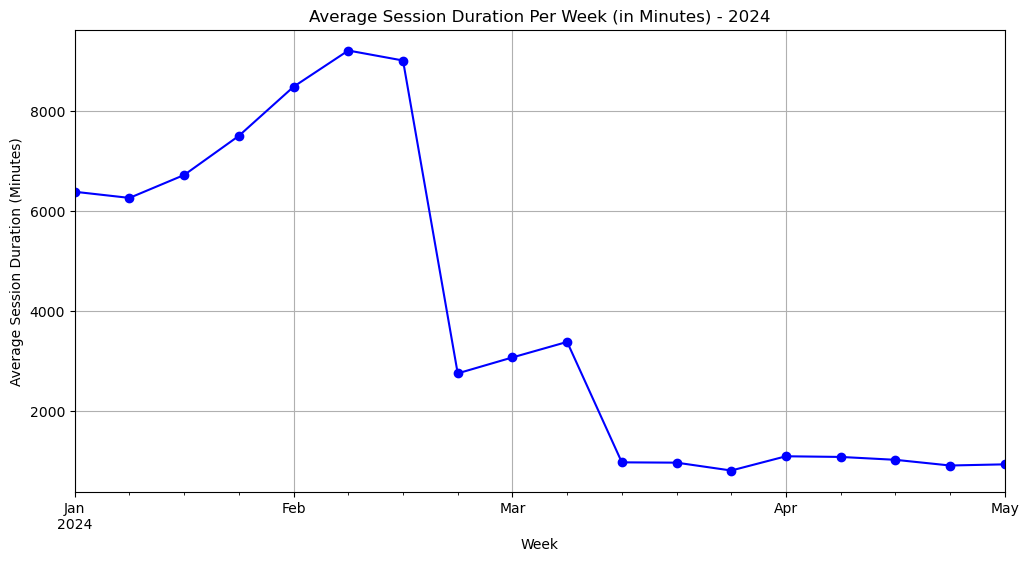

In [44]:

# Filter data for the year 2024
data_2024 = traffic_data[traffic_data['date'].dt.year == 2024]

# Set the date column as the index
data_2024.set_index('date', inplace=True)

# Resample the data by week and calculate the average session duration for each week
weekly_avg_duration_2024 = data_2024['session_duration'].resample('W').mean()

# Convert the average session duration from seconds to minutes
weekly_avg_duration_2024_minutes = weekly_avg_duration_2024 / 60

# Plot the time series
plt.figure(figsize=(12, 6))
weekly_avg_duration_2024_minutes.plot(marker='o', linestyle='-', color='b')
plt.title('Average Session Duration Per Week (in Minutes) - 2024')
plt.xlabel('Week')
plt.ylabel('Average Session Duration (Minutes)')
plt.grid(True)
plt.show()

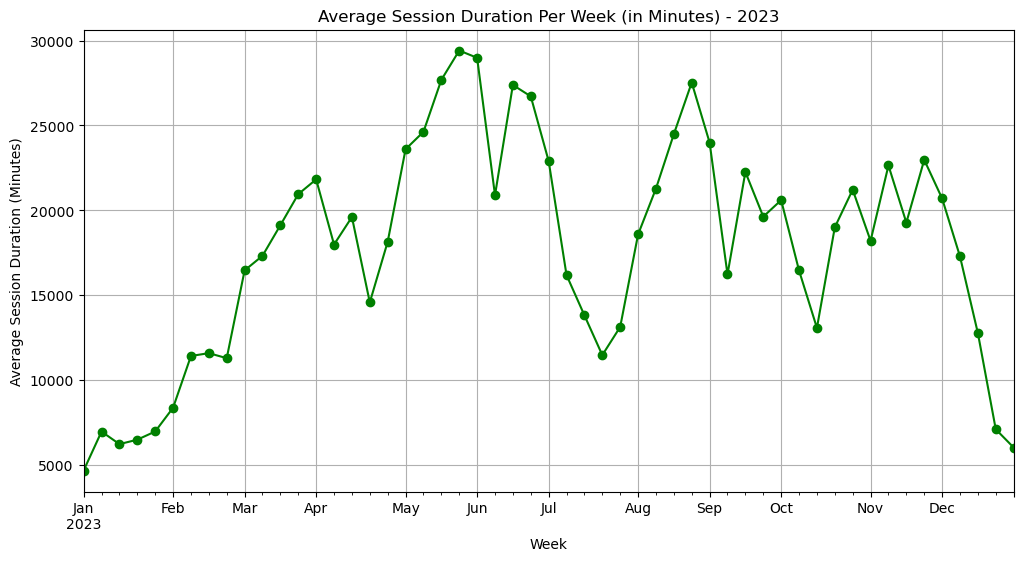

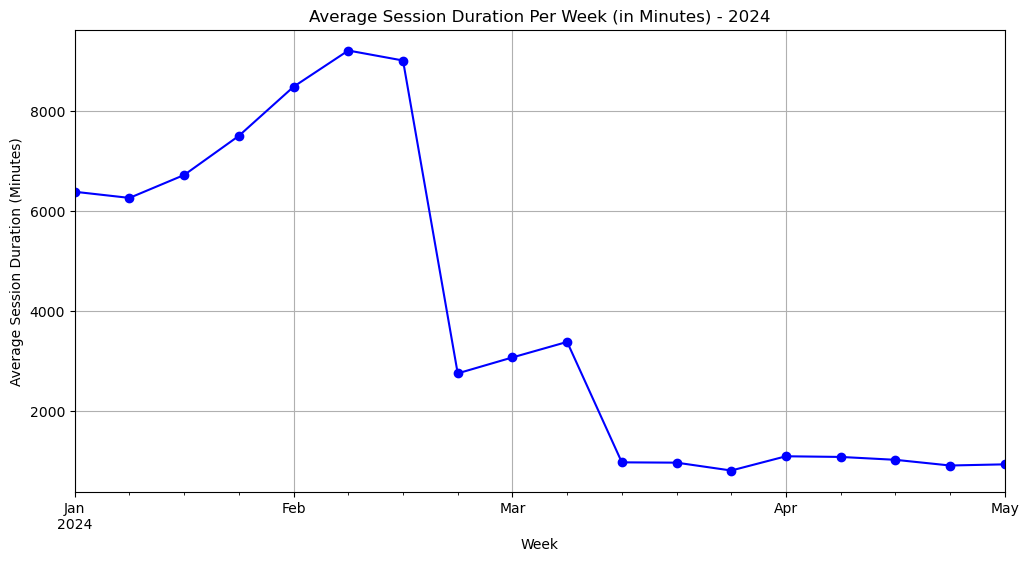

In [45]:
# Function to plot weekly average session duration for a given year
def plot_weekly_avg_duration(year):
    # Filter data for the specified year
    data_year = traffic_data[traffic_data['date'].dt.year == year]

    # Set the date column as the index
    data_year.set_index('date', inplace=True)

    # Resample the data by week and calculate the average session duration for each week
    weekly_avg_duration = data_year['session_duration'].resample('W').mean()

    # Convert the average session duration from seconds to minutes
    weekly_avg_duration_minutes = weekly_avg_duration / 60

    # Plot the time series
    plt.figure(figsize=(12, 6))
    weekly_avg_duration_minutes.plot(marker='o', linestyle='-', color='b' if year == 2024 else 'g')
    plt.title(f'Average Session Duration Per Week (in Minutes) - {year}')
    plt.xlabel('Week')
    plt.ylabel('Average Session Duration (Minutes)')
    plt.grid(True)
    plt.show()

# Plot for 2023
plot_weekly_avg_duration(2023)

# Plot for 2024
plot_weekly_avg_duration(2024)

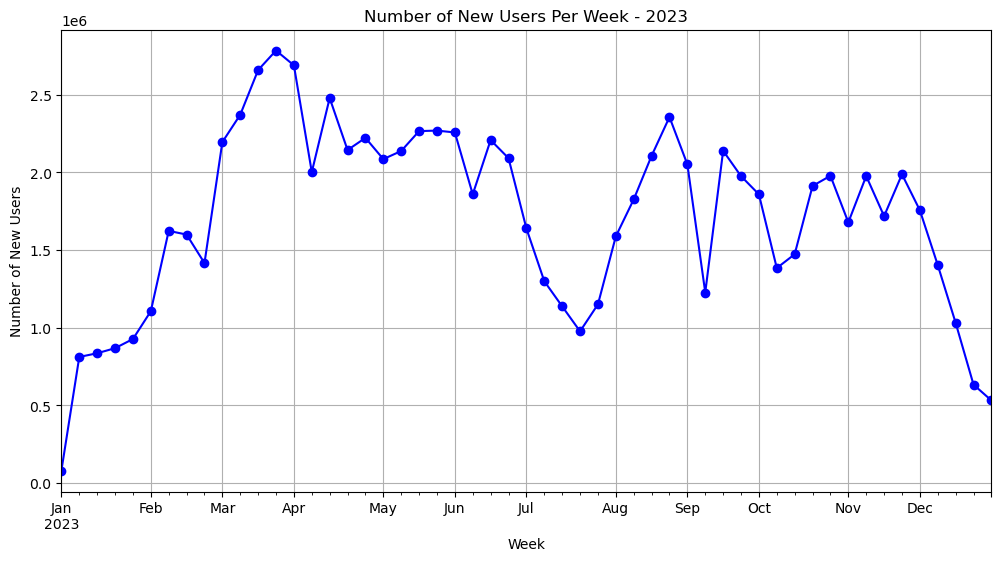

In [46]:
# Filter data for the year 2023
data_2023 = traffic_data[traffic_data['date'].dt.year == 2023]

# Set the date column as the index
data_2023.set_index('date', inplace=True)

# Resample the data by week and calculate the total number of new users for each week
weekly_new_users_2023 = data_2023['new_users'].resample('W').sum()

# Plot the time series
plt.figure(figsize=(12, 6))
weekly_new_users_2023.plot(marker='o', linestyle='-', color='b')
plt.title('Number of New Users Per Week - 2023')
plt.xlabel('Week')
plt.ylabel('Number of New Users')
plt.grid(True)
plt.show()

the line for number of new users per week in 2023 is almost the same as AVERAGE SESSION DURATION PER WEEK - THEREFORE THEY ARE CORRELATED

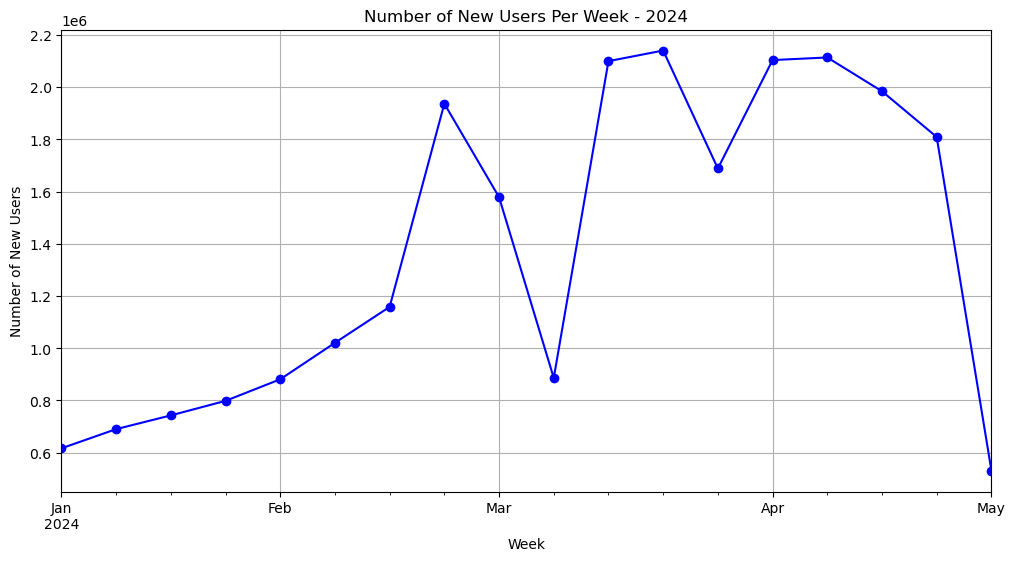

In [47]:
# Filter data for the year 2024
data_2024 = traffic_data[traffic_data['date'].dt.year == 2024]

# Set the date column as the index
data_2024.set_index('date', inplace=True)

# Resample the data by week and calculate the total number of new users for each week
weekly_new_users_2024 = data_2024['new_users'].resample('W').sum()

# Plot the time series
plt.figure(figsize=(12, 6))
weekly_new_users_2024.plot(marker='o', linestyle='-', color='b')
plt.title('Number of New Users Per Week - 2024')
plt.xlabel('Week')
plt.ylabel('Number of New Users')
plt.grid(True)
plt.show()

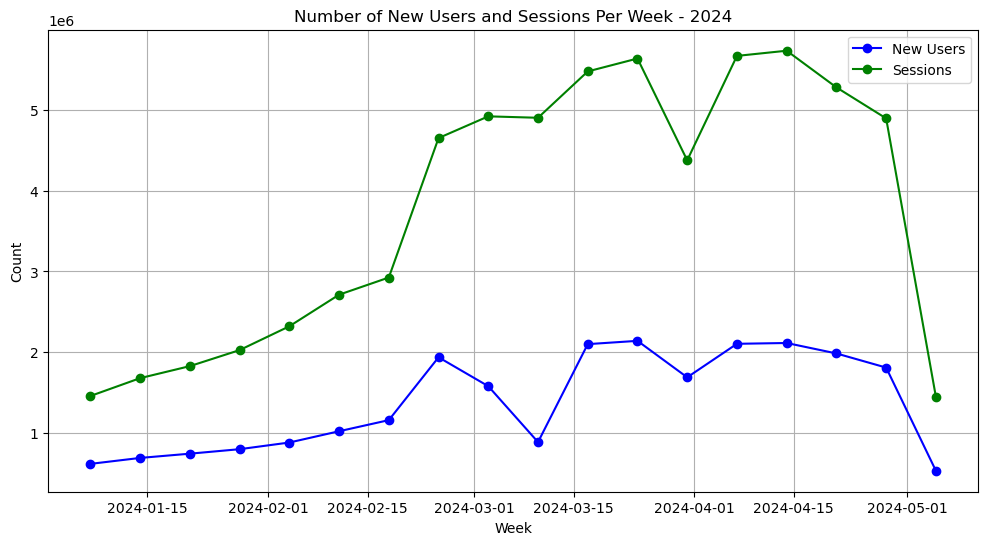

In [48]:
# Filter data for the year 2024
data_2024 = traffic_data[traffic_data['date'].dt.year == 2024]

# Set the date column as the index
data_2024.set_index('date', inplace=True)

# Resample the data by week and calculate the total number of new users and sessions for each week
weekly_new_users_2024 = data_2024['new_users'].resample('W').sum()
weekly_sessions_2024 = data_2024['sessions'].resample('W').sum()

# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(weekly_new_users_2024, marker='o', linestyle='-', color='b', label='New Users')
plt.plot(weekly_sessions_2024, marker='o', linestyle='-', color='g', label='Sessions')
plt.title('Number of New Users and Sessions Per Week - 2024')
plt.xlabel('Week')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.show()

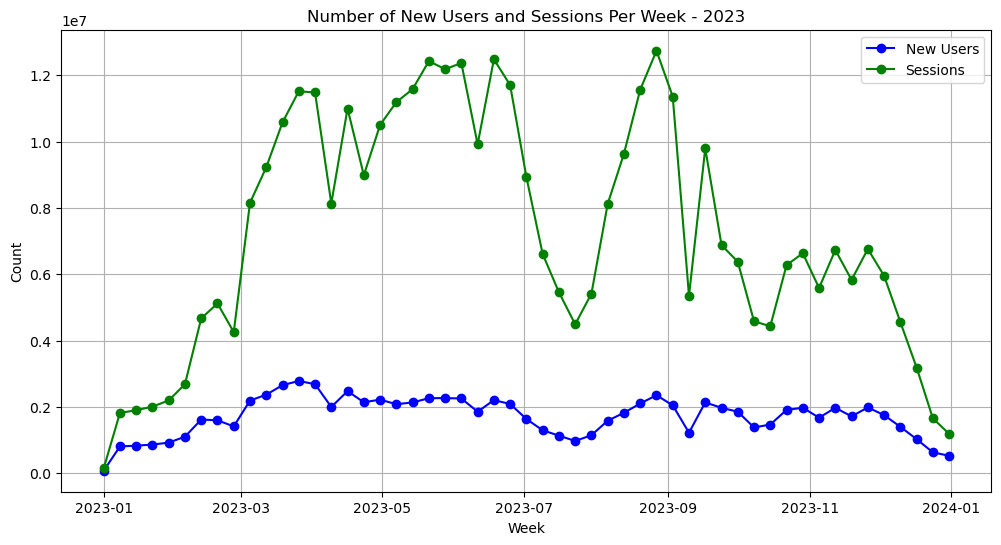

In [49]:
# Filter data for the year 2023
data_2023 = traffic_data[traffic_data['date'].dt.year == 2023]

# Set the date column as the index
data_2023.set_index('date', inplace=True)

# Resample the data by week and calculate the total number of new users and sessions for each week
weekly_new_users_2023 = data_2023['new_users'].resample('W').sum()
weekly_sessions_2023 = data_2023['sessions'].resample('W').sum()

# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(weekly_new_users_2023, marker='o', linestyle='-', color='b', label='New Users')
plt.plot(weekly_sessions_2023, marker='o', linestyle='-', color='g', label='Sessions')
plt.title('Number of New Users and Sessions Per Week - 2023')
plt.xlabel('Week')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.show()

## Correlation Matrix

C:\Users\User\AppData\Local\Temp\ipykernel_15260\2152987999.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2023['avg_session_duration_seconds'] = data_2023['avg_session_duration'].dt.total_seconds()


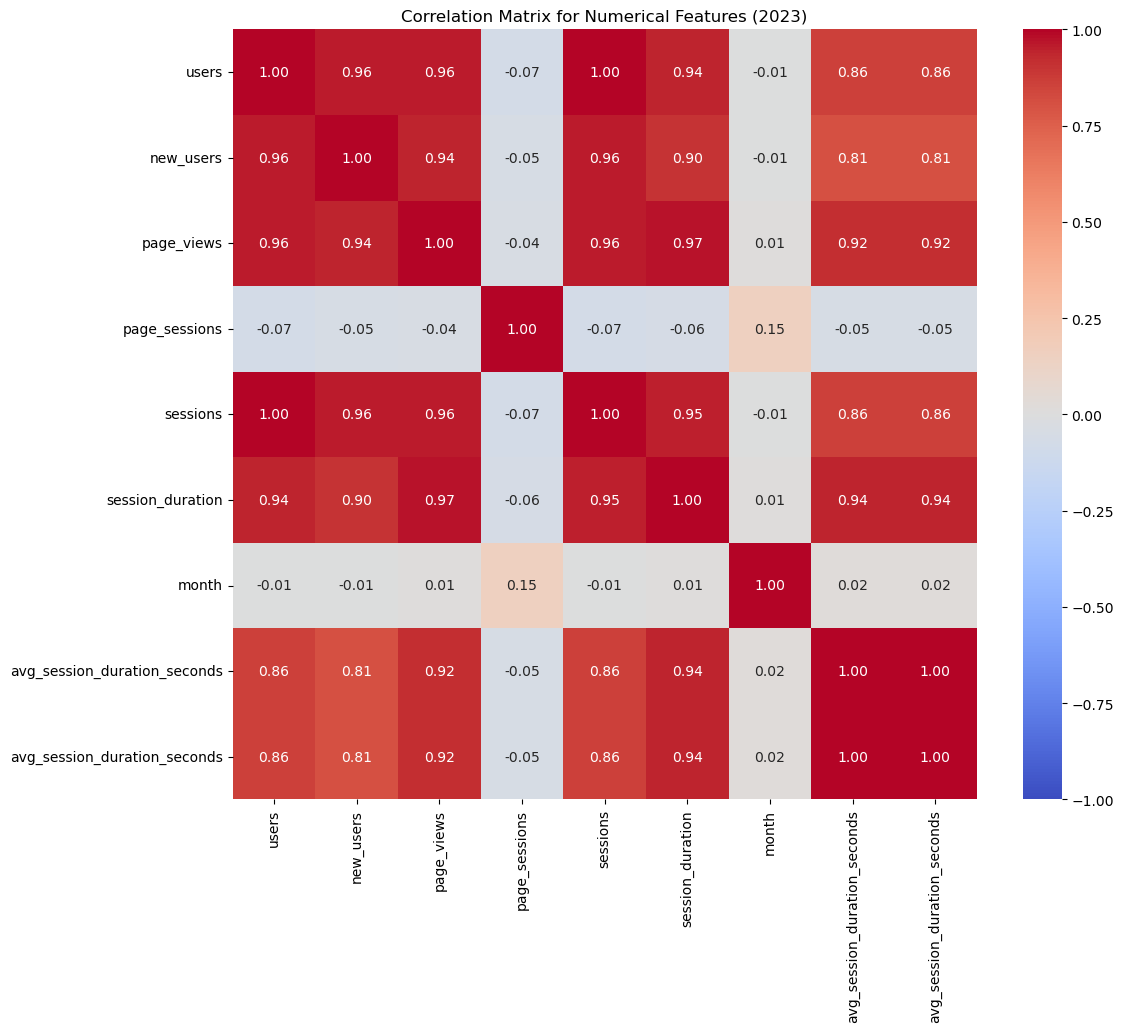

In [50]:
# Filter data for the year 2023
data_2023 = traffic_data[traffic_data['date'].dt.year == 2023]

# Convert 'avg_session_duration' to total seconds
data_2023['avg_session_duration_seconds'] = data_2023['avg_session_duration'].dt.total_seconds()

# Select only numerical columns for correlation matrix
numerical_columns_2023 = data_2023.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_columns_2023.append('avg_session_duration_seconds')

# Generate the correlation matrix
correlation_matrix_2023 = data_2023[numerical_columns_2023].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_2023, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix for Numerical Features (2023)')
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_15260\2339838472.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2024['avg_session_duration_seconds'] = data_2024['avg_session_duration'].dt.total_seconds()


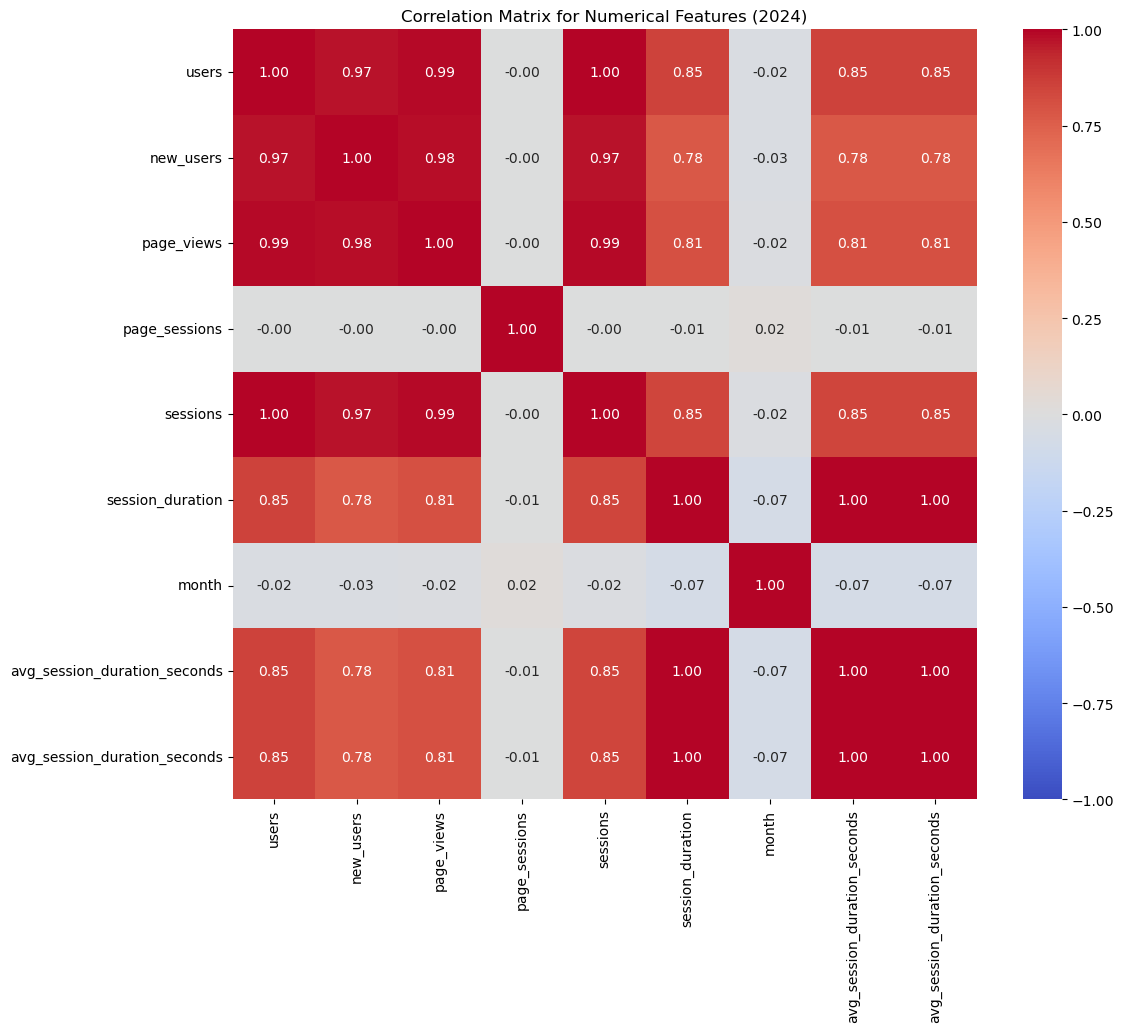

In [51]:
# Filter data for the year 2024
data_2024 = traffic_data[traffic_data['date'].dt.year == 2024]

# Convert 'avg_session_duration' to total seconds
data_2024['avg_session_duration_seconds'] = data_2024['avg_session_duration'].dt.total_seconds()

# Select only numerical columns for correlation matrix
numerical_columns_2024 = data_2024.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_columns_2024.append('avg_session_duration_seconds')

# Generate the correlation matrix
correlation_matrix_2024 = data_2024[numerical_columns_2024].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_2024, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix for Numerical Features (2024)')
plt.show()

## Visualize the Distribution of Key Features

In [52]:
# Identify key numerical and categorical features
numerical_features = traffic_data.select_dtypes(include=['int64', 'float64']).columns
categorical_features = traffic_data.select_dtypes(include=['object']).columns

In [53]:
# Identify key numerical features
numerical_features = traffic_data.select_dtypes(include=['int64', 'float64']).columns

# Function to format large numbers
def human_format(num, pos):
    if num >= 1e6:
        return f'{num/1e6:.1f}M'
    elif num >= 1e3:
        return f'{num/1e3:.1f}K'
    else:
        return str(num)

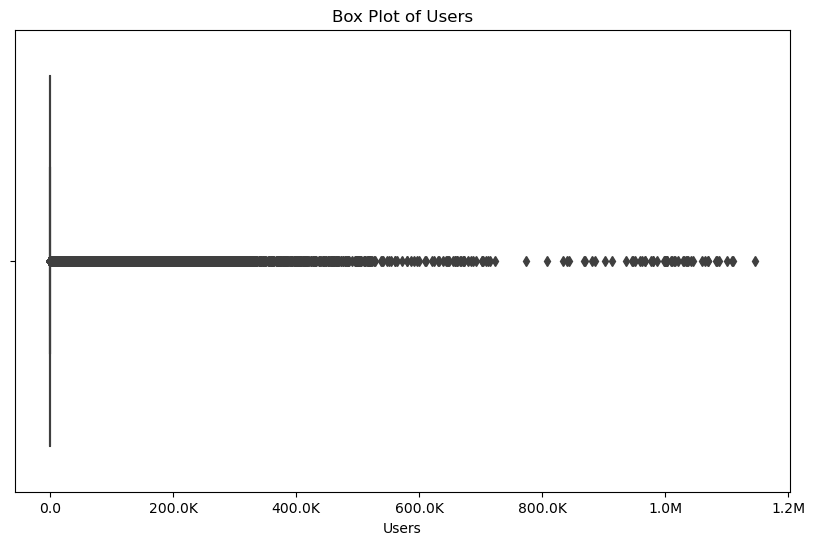

In [54]:
# Plot for 'feature1'
feature = 'users'
plt.figure(figsize=(10, 6))
sns.boxplot(x=traffic_data[feature])
plt.title(f'Box Plot of {feature.capitalize()}')
plt.xlabel(feature.capitalize())

# Format the x-axis labels
plt.gca().xaxis.set_major_formatter(FuncFormatter(human_format))

plt.show()

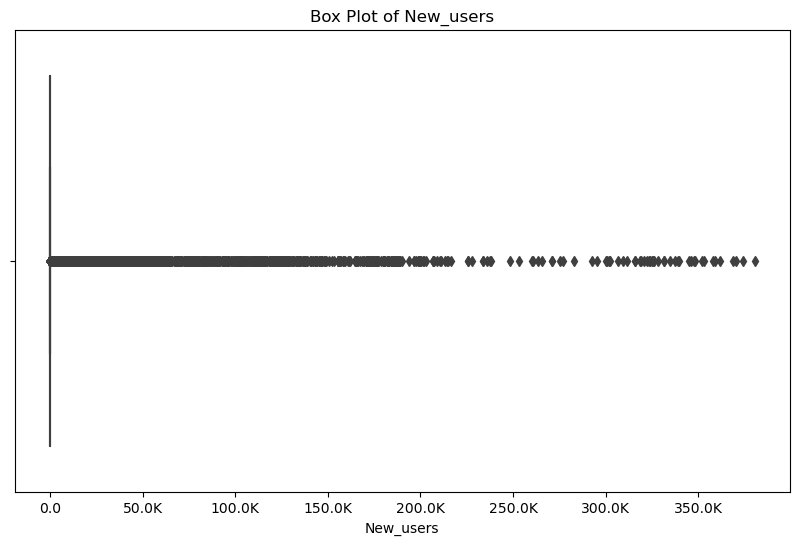

In [55]:
# Plot for 'feature1'
feature = 'new_users'
plt.figure(figsize=(10, 6))
sns.boxplot(x=traffic_data[feature])
plt.title(f'Box Plot of {feature.capitalize()}')
plt.xlabel(feature.capitalize())

# Format the x-axis labels
plt.gca().xaxis.set_major_formatter(FuncFormatter(human_format))

plt.show()

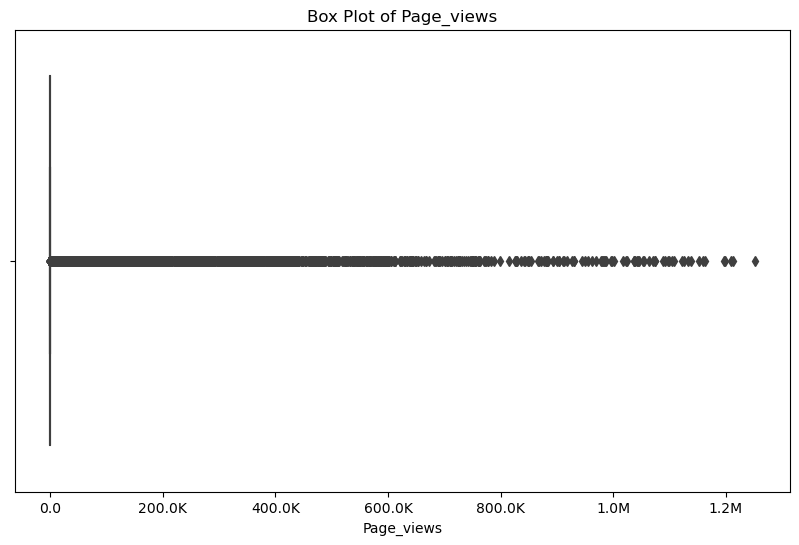

In [56]:
# Plot for 'feature1'
feature = 'page_views'
plt.figure(figsize=(10, 6))
sns.boxplot(x=traffic_data[feature])
plt.title(f'Box Plot of {feature.capitalize()}')
plt.xlabel(feature.capitalize())

# Format the x-axis labels
plt.gca().xaxis.set_major_formatter(FuncFormatter(human_format))

plt.show()

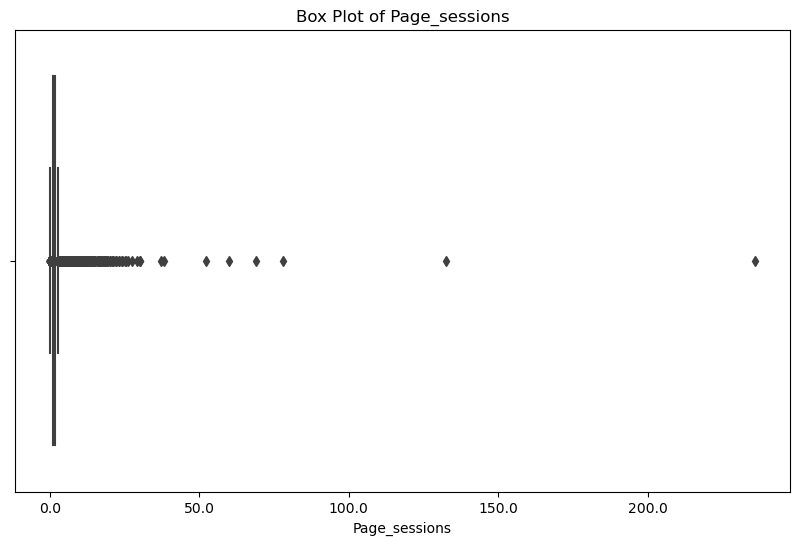

In [57]:
# Plot for 'feature1'
feature = 'page_sessions'
plt.figure(figsize=(10, 6))
sns.boxplot(x=traffic_data[feature])
plt.title(f'Box Plot of {feature.capitalize()}')
plt.xlabel(feature.capitalize())

# Format the x-axis labels
plt.gca().xaxis.set_major_formatter(FuncFormatter(human_format))

plt.show()

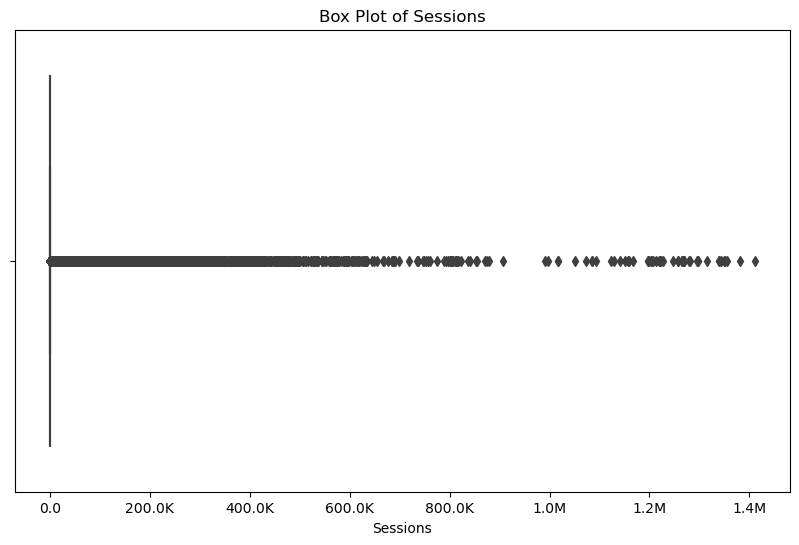

In [58]:
# Plot for 'feature1'
feature = 'sessions'
plt.figure(figsize=(10, 6))
sns.boxplot(x=traffic_data[feature])
plt.title(f'Box Plot of {feature.capitalize()}')
plt.xlabel(feature.capitalize())

# Format the x-axis labels
plt.gca().xaxis.set_major_formatter(FuncFormatter(human_format))

plt.show()

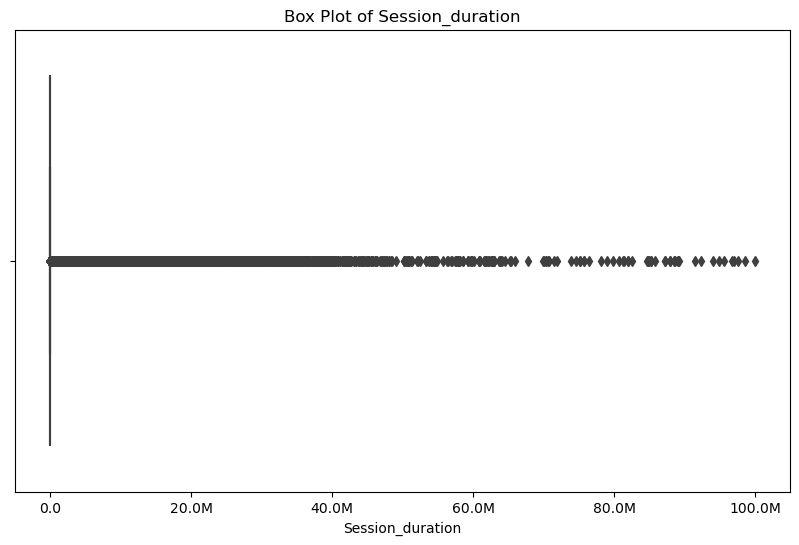

In [59]:
# Plot for 'feature1'
feature = 'session_duration'
plt.figure(figsize=(10, 6))
sns.boxplot(x=traffic_data[feature])
plt.title(f'Box Plot of {feature.capitalize()}')
plt.xlabel(feature.capitalize())

# Format the x-axis labels
plt.gca().xaxis.set_major_formatter(FuncFormatter(human_format))

plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_15260\545542168.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = traffic_data.corr()


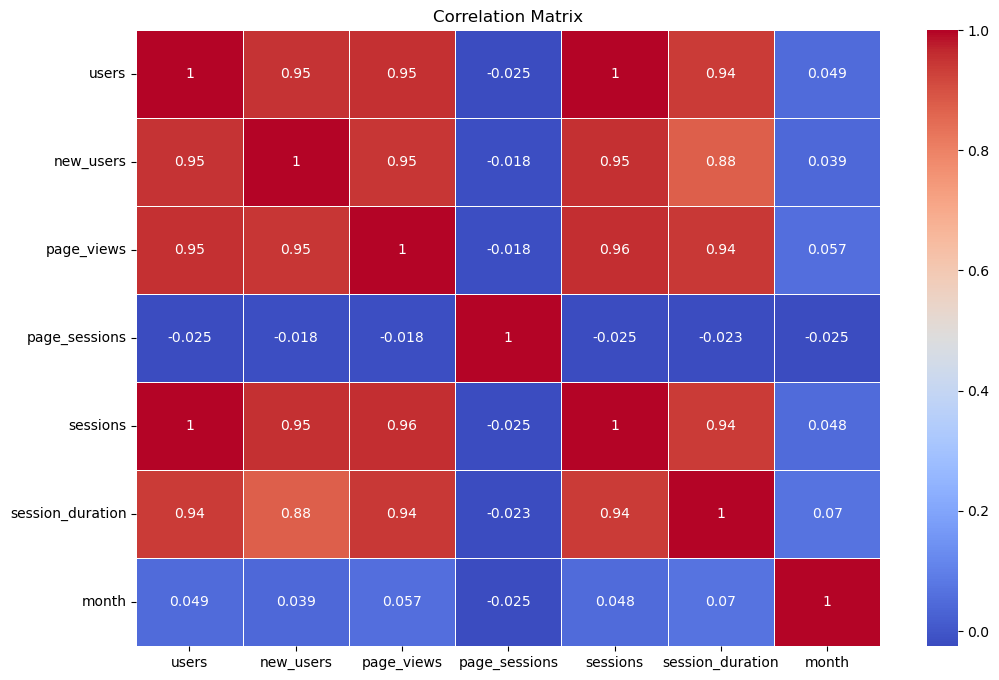

In [60]:
# Correlation matrix for numerical features
correlation_matrix = traffic_data.corr()
# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

A correlation matrix shows the relationship between numerical features. Correlation values range from -1 to 1, where:

1: Perfect positive correlation.
0: No correlation.
-1: Perfect negative correlation. 

Strong Positive Correlation:

sessions and users
page views and users
page views and new users

Weak/moderate positive Correlation
new users and session duration


No Significant Correlation
page sessions have almost no corretaliton with the other dimensions

## Identify top channels for traffic for 2024

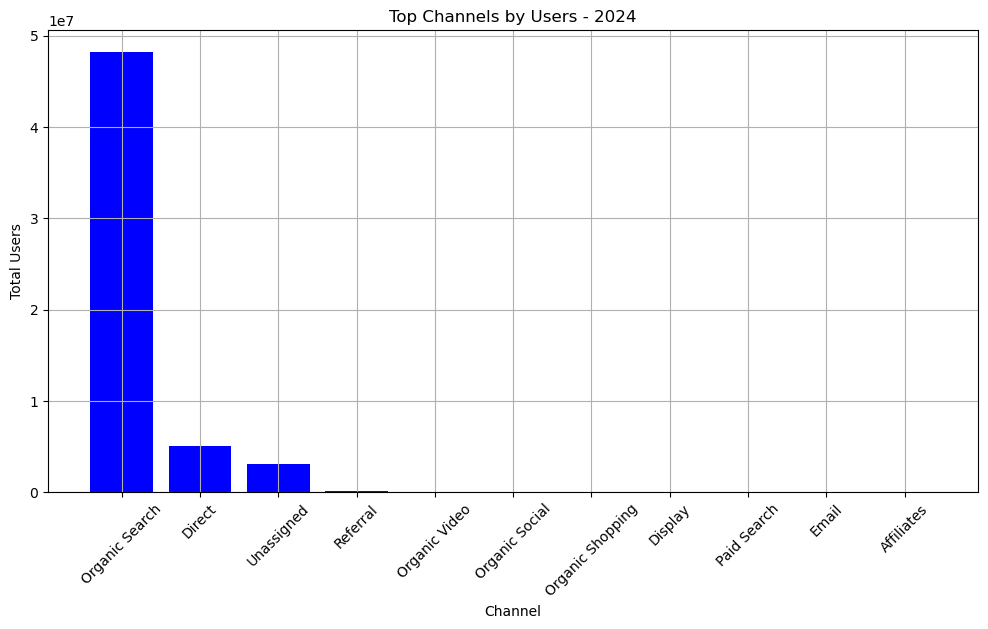

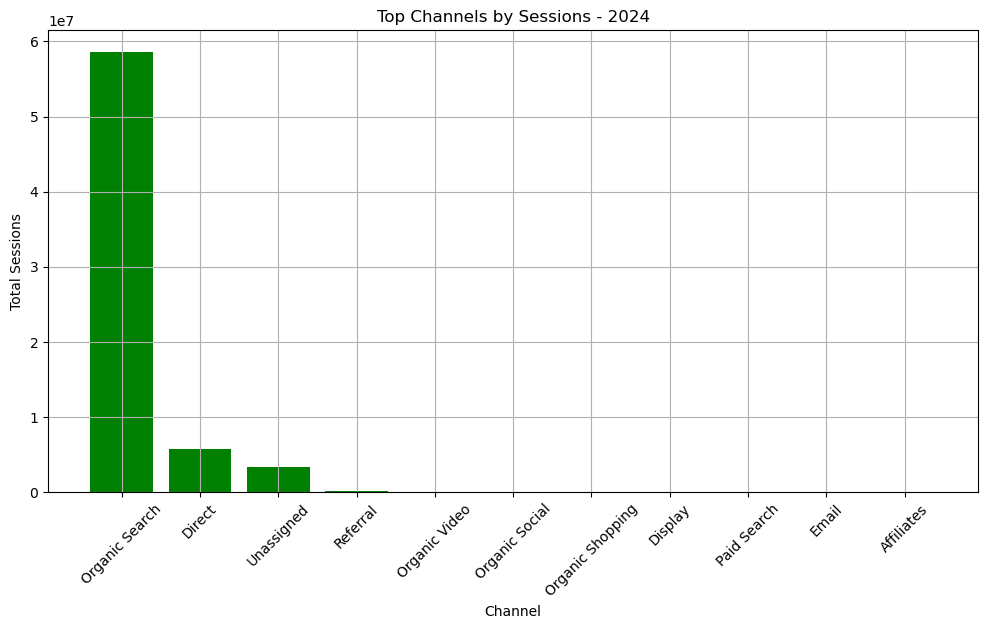

In [61]:
# Aggregate data by channel and calculate the total number of users and sessions
channel_traffic_2024 = data_2024.groupby('channel').agg({
    'users': 'sum',
    'sessions': 'sum'
}).reset_index()

# Sort by the number of users
top_channels_by_users_2024 = channel_traffic_2024.sort_values(by='users', ascending=False)

# Sort by the number of sessions
top_channels_by_sessions_2024 = channel_traffic_2024.sort_values(by='sessions', ascending=False)

# Plot the top channels by users
plt.figure(figsize=(12, 6))
plt.bar(top_channels_by_users_2024['channel'], top_channels_by_users_2024['users'], color='b')
plt.title('Top Channels by Users - 2024')
plt.xlabel('Channel')
plt.ylabel('Total Users')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Plot the top channels by sessions
plt.figure(figsize=(12, 6))
plt.bar(top_channels_by_sessions_2024['channel'], top_channels_by_sessions_2024['sessions'], color='g')
plt.title('Top Channels by Sessions - 2024')
plt.xlabel('Channel')
plt.ylabel('Total Sessions')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()



In [62]:


# Filter data for the year 2024
data_2024 = traffic_data[traffic_data['date'].dt.year == 2024]

# Group by 'channel' and calculate the total number of users and sessions for each channel in 2024
channel_traffic_2024 = data_2024.groupby('channel').agg({
    'users': 'sum',
    'sessions': 'sum'
}).reset_index()

# Display the table
print(channel_traffic_2024)



             channel     users  sessions
0         Affiliates         1         1
1             Direct   5104969   5782844
2            Display        97       122
3              Email         4         4
4     Organic Search  48206280  58543093
5   Organic Shopping       105       135
6     Organic Social     42062     50385
7      Organic Video     53204     63013
8        Paid Search        11        12
9           Referral    102902    120680
10        Unassigned   3125067   3375381


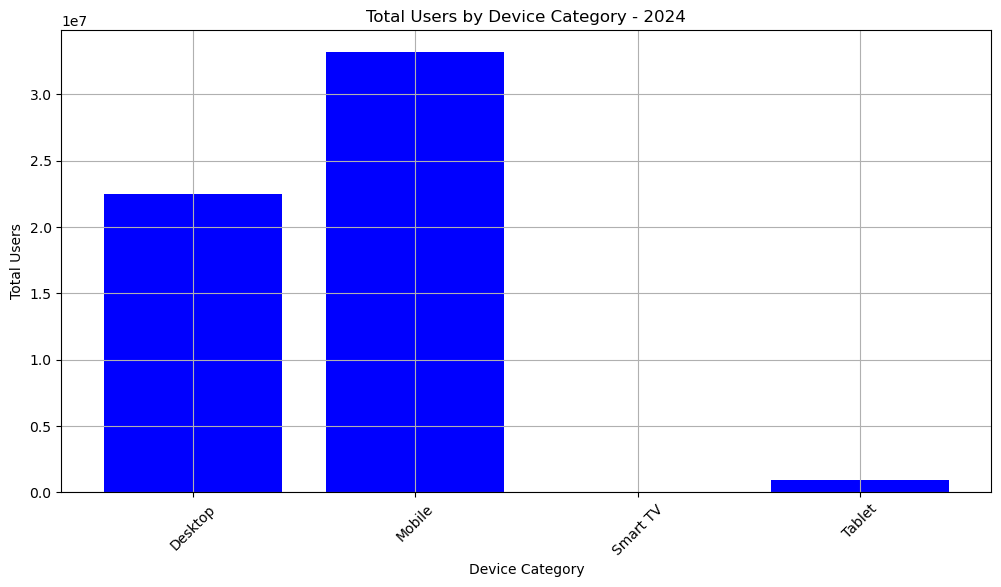

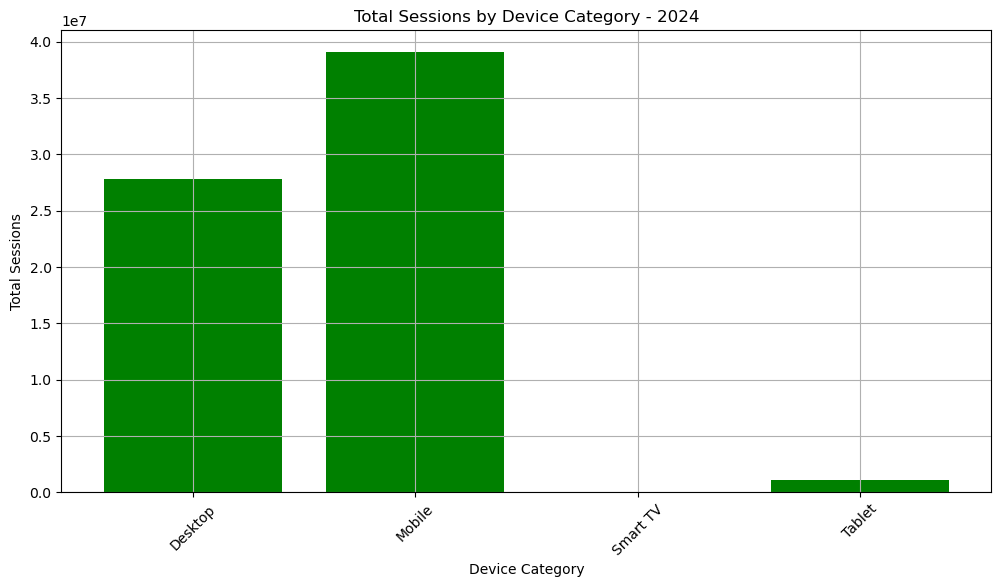

In [63]:
# Aggregate data by device category and calculate the total number of users and sessions
device_traffic_2024 = data_2024.groupby('device_category').agg({
    'users': 'sum',
    'sessions': 'sum'
}).reset_index()

# Plot the total users by device category
plt.figure(figsize=(12, 6))
plt.bar(device_traffic_2024['device_category'], device_traffic_2024['users'], color='b')
plt.title('Total Users by Device Category - 2024')
plt.xlabel('Device Category')
plt.ylabel('Total Users')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Plot the total sessions by device category
plt.figure(figsize=(12, 6))
plt.bar(device_traffic_2024['device_category'], device_traffic_2024['sessions'], color='g')
plt.title('Total Sessions by Device Category - 2024')
plt.xlabel('Device Category')
plt.ylabel('Total Sessions')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()



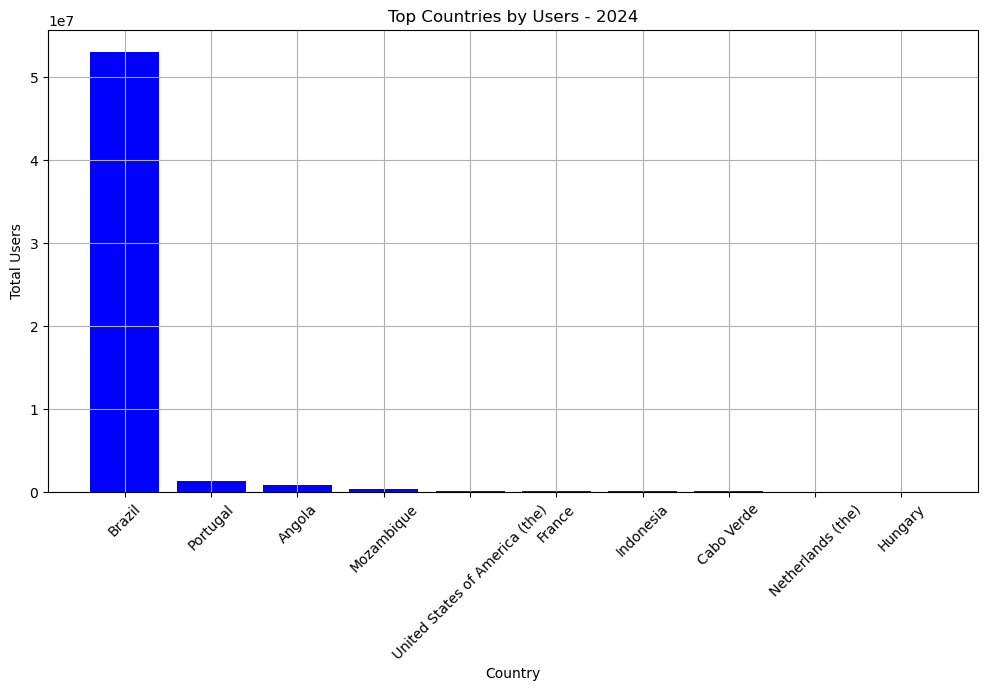

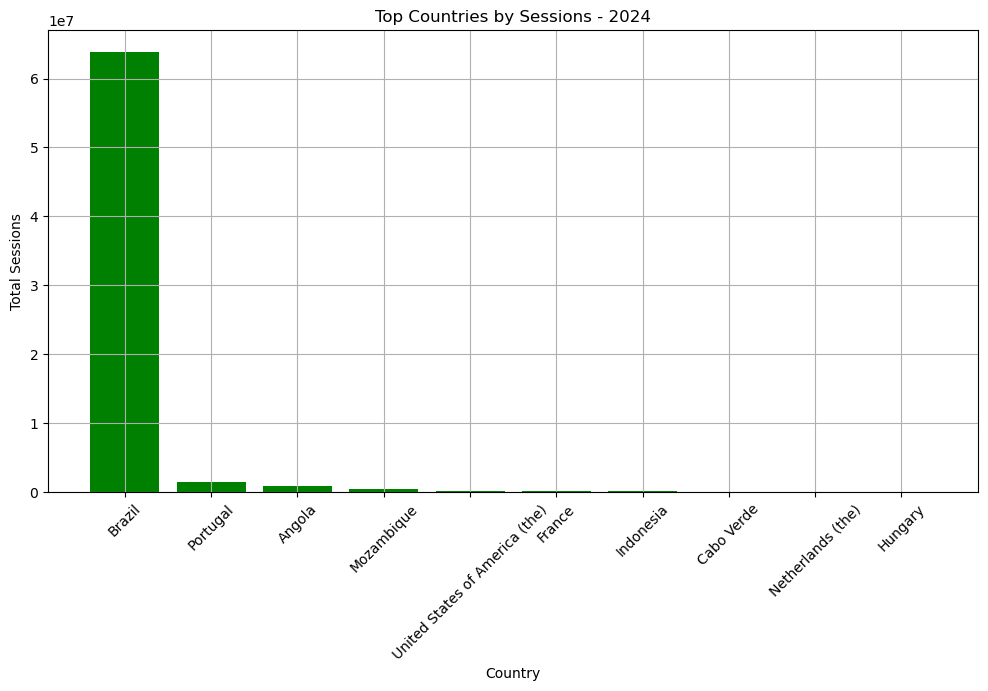

In [64]:
# Aggregate data by country and calculate the total number of users and sessions
country_traffic_2024 = data_2024.groupby('country').agg({
    'users': 'sum',
    'sessions': 'sum'
}).reset_index()

# Sort by the number of users
top_countries_by_users_2024 = country_traffic_2024.sort_values(by='users', ascending=False).head(10)

# Plot the top countries by users
plt.figure(figsize=(12, 6))
plt.bar(top_countries_by_users_2024['country'], top_countries_by_users_2024['users'], color='b')
plt.title('Top Countries by Users - 2024')
plt.xlabel('Country')
plt.ylabel('Total Users')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Sort by the number of sessions
top_countries_by_sessions_2024 = country_traffic_2024.sort_values(by='sessions', ascending=False).head(10)

# Plot the top countries by sessions
plt.figure(figsize=(12, 6))
plt.bar(top_countries_by_sessions_2024['country'], top_countries_by_sessions_2024['sessions'], color='g')
plt.title('Top Countries by Sessions - 2024')
plt.xlabel('Country')
plt.ylabel('Total Sessions')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


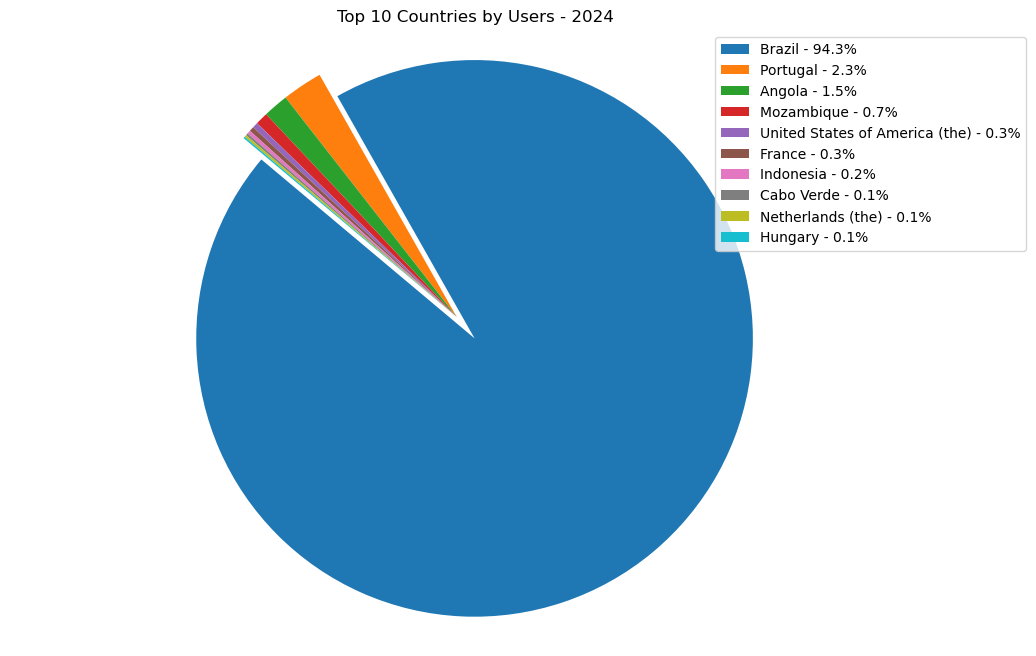

In [65]:


# Aggregate data by country and calculate the total number of users for each country in 2024
country_traffic_2024 = data_2024.groupby('country')['users'].sum().reset_index()

# Sort by the number of users and take the top 10 countries
top_countries_by_users_2024 = country_traffic_2024.sort_values(by='users', ascending=False).head(10)

# Explode the slices for better readability
explode = [0.1 if i == 0 else 0 for i in range(len(top_countries_by_users_2024))]

# Define a color palette
colors = plt.get_cmap('tab10').colors

# Calculate percentages for the legend
top_countries_by_users_2024['percentage'] = (top_countries_by_users_2024['users'] / top_countries_by_users_2024['users'].sum()) * 100

# Combine country names and percentages for the legend
legend_labels = top_countries_by_users_2024.apply(lambda row: f"{row['country']} - {row['percentage']:.1f}%", axis=1)

# Plot the pie chart
plt.figure(figsize=(12, 8))
plt.pie(top_countries_by_users_2024['users'], labels=None, startangle=140, explode=explode, colors=colors)
plt.title('Top 10 Countries by Users - 2024')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(legend_labels, loc='upper right', bbox_to_anchor=(1.1, 1))
plt.show()



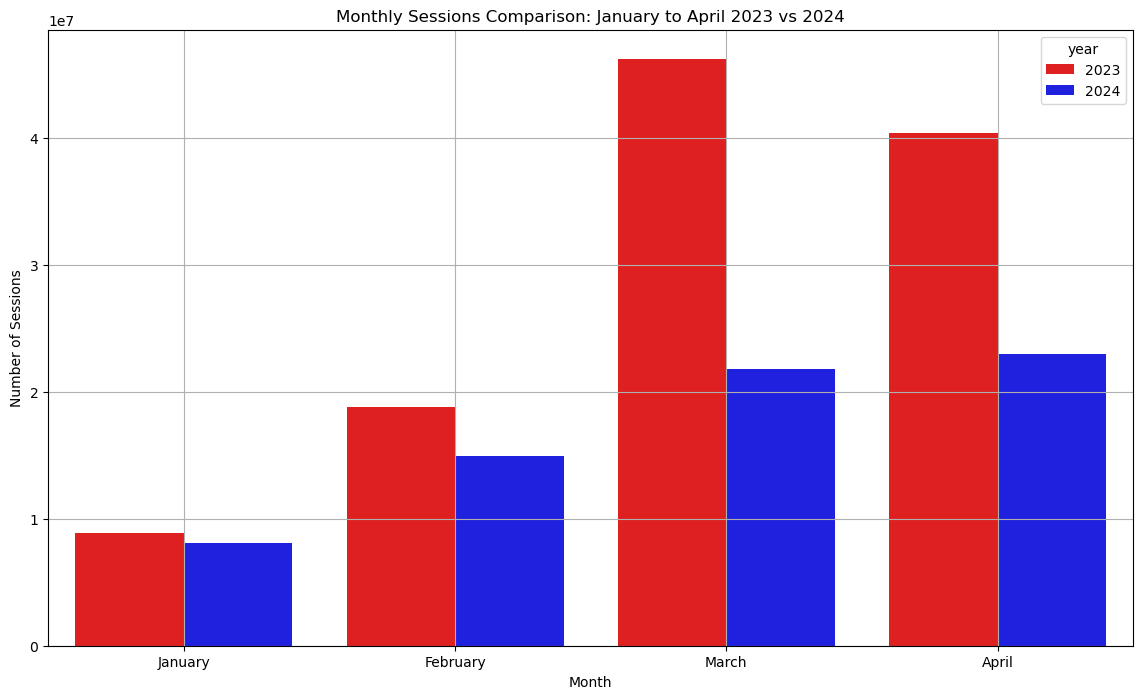

In [66]:
# Filter data for January to April for 2023 and 2024
data_jan_apr_2023 = traffic_data[(traffic_data['date'].dt.year == 2023) & (traffic_data['date'].dt.month.isin([1, 2, 3, 4]))]
data_jan_apr_2024 = traffic_data[(traffic_data['date'].dt.year == 2024) & (traffic_data['date'].dt.month.isin([1, 2, 3, 4]))]

# Aggregate sessions by month and year
monthly_sessions_2023 = data_jan_apr_2023.groupby(data_jan_apr_2023['date'].dt.month)['sessions'].sum().reset_index()
monthly_sessions_2024 = data_jan_apr_2024.groupby(data_jan_apr_2024['date'].dt.month)['sessions'].sum().reset_index()

# Add a 'year' column for distinction
monthly_sessions_2023['year'] = 2023
monthly_sessions_2024['year'] = 2024

# Concatenate the dataframes for comparison
monthly_sessions = pd.concat([monthly_sessions_2023, monthly_sessions_2024])

# Rename the columns for clarity
monthly_sessions.columns = ['month', 'sessions', 'year']

# Plot the comparison using seaborn
plt.figure(figsize=(14, 8))
sns.barplot(x='month', y='sessions', hue='year', data=monthly_sessions, palette={2023: 'red', 2024: 'blue'})
plt.title('Monthly Sessions Comparison: January to April 2023 vs 2024')
plt.xlabel('Month')
plt.ylabel('Number of Sessions')
plt.xticks(ticks=[0, 1, 2, 3], labels=['January', 'February', 'March', 'April'])
plt.grid(True)
plt.show()


## Across channels 

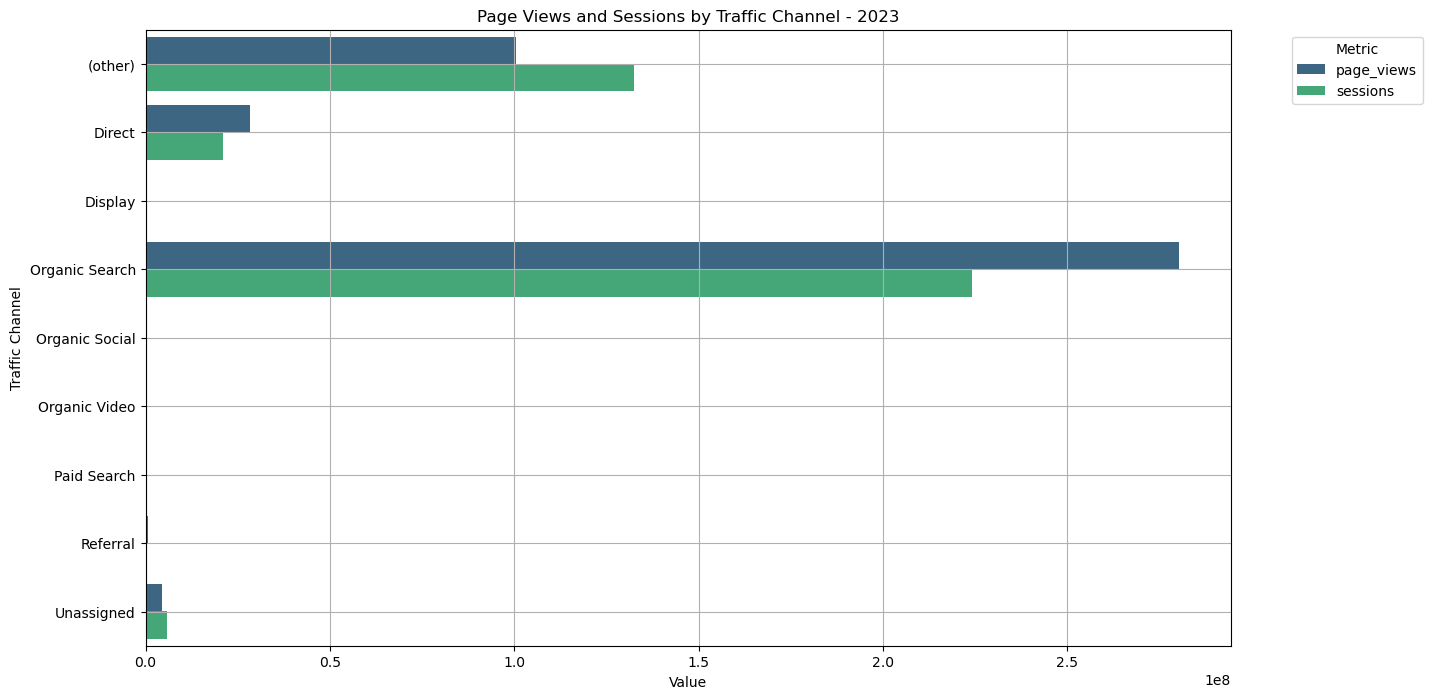

In [67]:
# Filter data for the year 2023
data_2023 = traffic_data[traffic_data['date'].dt.year == 2023].copy()

# Group by 'channel' and calculate engagement metrics
channel_engagement_2023 = data_2023.groupby('channel').agg({
    'page_views': 'sum',
    'sessions': 'sum'
}).reset_index()

# Melt the dataframe for easier plotting with Seaborn
channel_engagement_melted = channel_engagement_2023.melt(id_vars='channel', value_vars=['page_views', 'sessions'], var_name='Metric', value_name='Value')

# Plot the engagement metrics for each channel
plt.figure(figsize=(14, 8))
sns.barplot(x='Value', y='channel', hue='Metric', data=channel_engagement_melted, palette='viridis')
plt.title('Page Views and Sessions by Traffic Channel - 2023')
plt.xlabel('Value')
plt.ylabel('Traffic Channel')
plt.legend(title='Metric', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


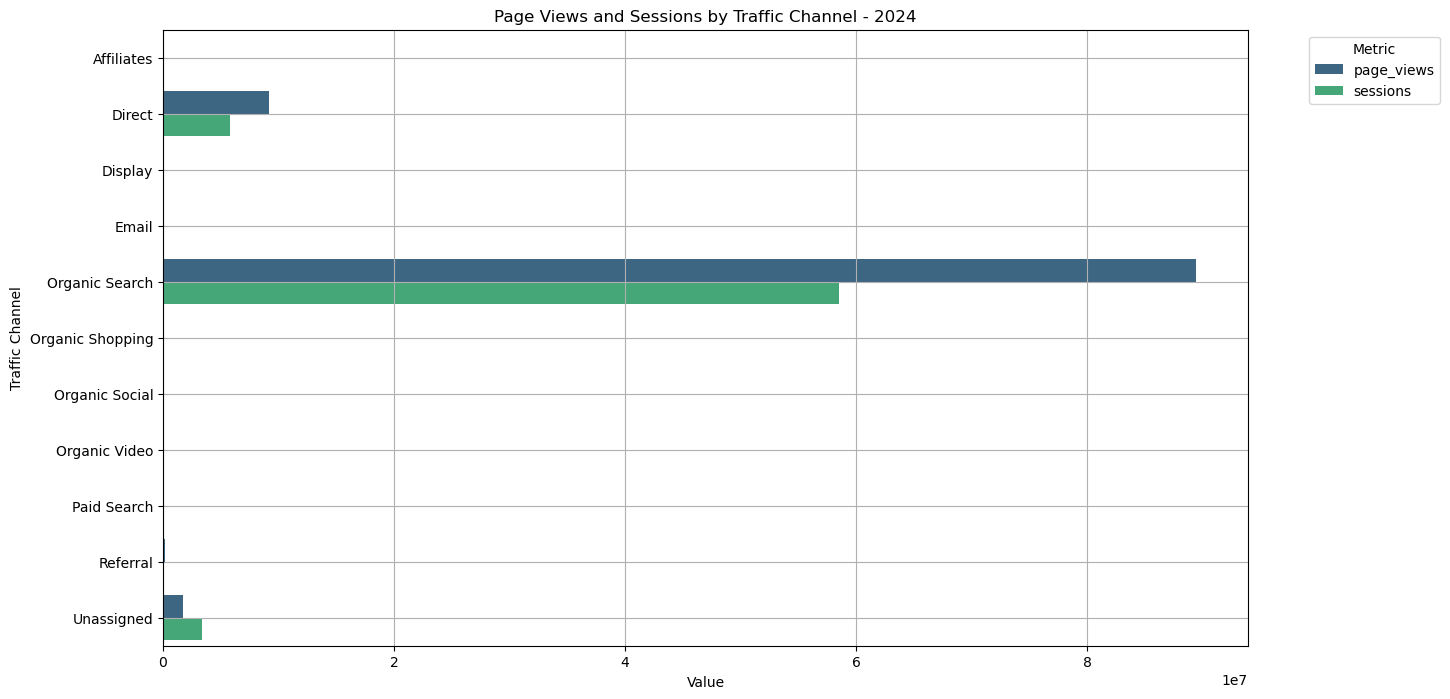

In [68]:


# Filter data for the year 2024
data_2024 = traffic_data[traffic_data['date'].dt.year == 2024].copy()

# Group by 'channel' and calculate engagement metrics
channel_engagement_2024 = data_2024.groupby('channel').agg({
    'page_views': 'sum',
    'sessions': 'sum'
}).reset_index()

# Melt the dataframe for easier plotting with Seaborn
channel_engagement_melted_2024 = channel_engagement_2024.melt(id_vars='channel', value_vars=['page_views', 'sessions'], var_name='Metric', value_name='Value')

# Plot the engagement metrics for each channel
plt.figure(figsize=(14, 8))
sns.barplot(x='Value', y='channel', hue='Metric', data=channel_engagement_melted_2024, palette='viridis')
plt.title('Page Views and Sessions by Traffic Channel - 2024')
plt.xlabel('Value')
plt.ylabel('Traffic Channel')
plt.legend(title='Metric', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


In [69]:
# Filter data for the year 2023 and 2024
data_2023 = traffic_data[traffic_data['date'].dt.year == 2023].copy()
data_2024 = traffic_data[traffic_data['date'].dt.year == 2024].copy()

# Calculate page views per session for 2023 and 2024

# For 2023
page_views_per_session_2023 = data_2023['page_views'].sum() / data_2023['sessions'].sum()

# For 2024
page_views_per_session_2024 = data_2024['page_views'].sum() / data_2024['sessions'].sum()

# Print the results
print(f"Page views per session in 2023: {page_views_per_session_2023}")
print(f"Page views per session in 2024: {page_views_per_session_2024}")

Page views per session in 2023: 1.0787282511495062
Page views per session in 2024: 1.4839080412396022


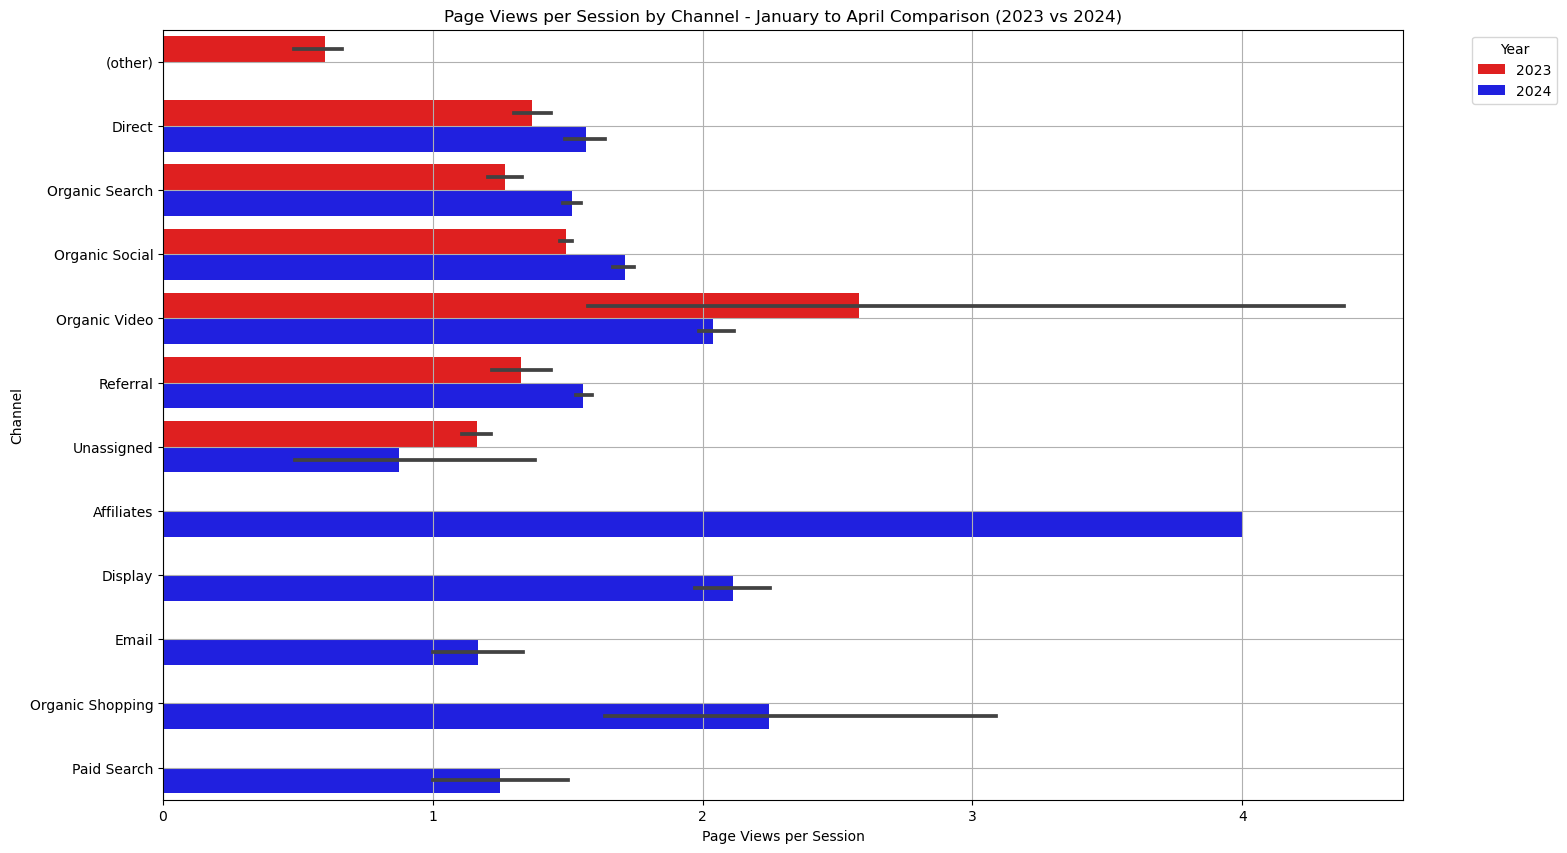

In [70]:

# Filter data for the first four months (January to April) for 2023 and 2024
data_jan_apr_2023 = traffic_data[(traffic_data['date'].dt.year == 2023) & (traffic_data['date'].dt.month.isin([1, 2, 3, 4]))]
data_jan_apr_2024 = traffic_data[(traffic_data['date'].dt.year == 2024) & (traffic_data['date'].dt.month.isin([1, 2, 3, 4]))]

# Group by 'channel' and 'month' and calculate the page views per session
channel_engagement_2023 = data_jan_apr_2023.groupby(['channel', data_jan_apr_2023['date'].dt.month]).agg({
    'page_views': 'sum',
    'sessions': 'sum'
}).reset_index()
channel_engagement_2023['page_views_per_session'] = channel_engagement_2023['page_views'] / channel_engagement_2023['sessions']
channel_engagement_2023['year'] = 2023

channel_engagement_2024 = data_jan_apr_2024.groupby(['channel', data_jan_apr_2024['date'].dt.month]).agg({
    'page_views': 'sum',
    'sessions': 'sum'
}).reset_index()
channel_engagement_2024['page_views_per_session'] = channel_engagement_2024['page_views'] / channel_engagement_2024['sessions']
channel_engagement_2024['year'] = 2024

# Concatenate the dataframes for comparison
channel_engagement = pd.concat([channel_engagement_2023, channel_engagement_2024])

# Rename the columns for clarity
channel_engagement.columns = ['channel', 'month', 'page_views', 'sessions', 'page_views_per_session', 'year']

# Plot the comparison using seaborn
plt.figure(figsize=(16, 10))
sns.barplot(x='page_views_per_session', y='channel', hue='year', data=channel_engagement, palette={2023: 'red', 2024: 'blue'})
plt.title('Page Views per Session by Channel - January to April Comparison (2023 vs 2024)')
plt.xlabel('Page Views per Session')
plt.ylabel('Channel')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()



In the context of this plot:

Shorter black lines: Indicate that there is less variability in the data, and the mean is more precise.
Longer black lines: Indicate that there is more variability in the data, and the mean is less precise.

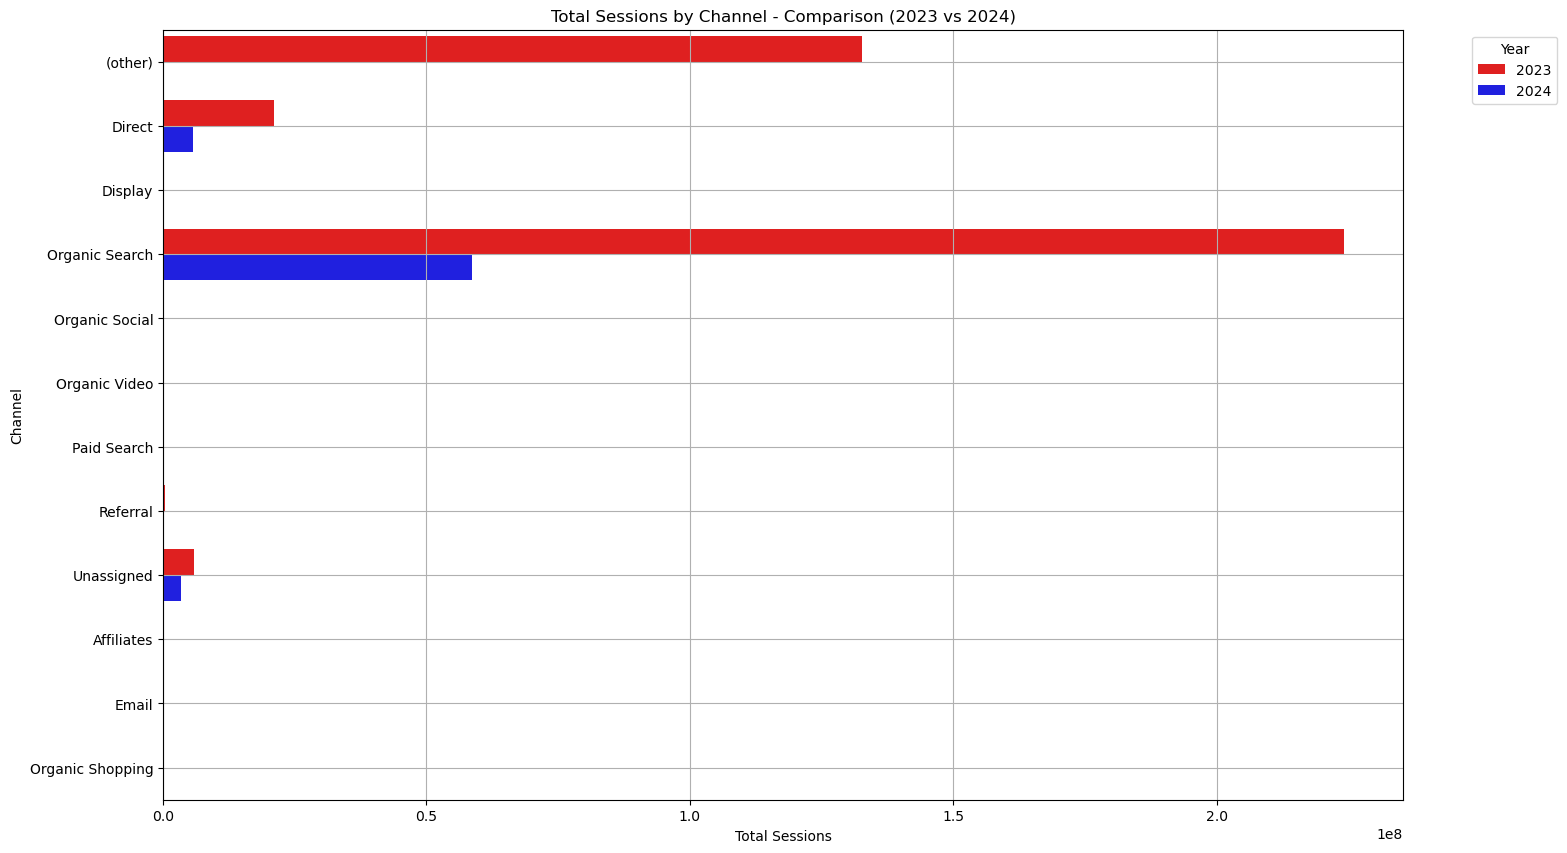

In [71]:


# Filter data for the year 2023 and 2024
data_2023 = traffic_data[traffic_data['date'].dt.year == 2023].copy()
data_2024 = traffic_data[traffic_data['date'].dt.year == 2024].copy()

# Group by 'channel' and calculate the total sessions for each channel in 2023 and 2024
channel_sessions_2023 = data_2023.groupby('channel')['sessions'].sum().reset_index()
channel_sessions_2024 = data_2024.groupby('channel')['sessions'].sum().reset_index()

# Add a 'year' column for distinction
channel_sessions_2023['year'] = 2023
channel_sessions_2024['year'] = 2024

# Concatenate the dataframes for comparison
channel_sessions = pd.concat([channel_sessions_2023, channel_sessions_2024])

# Rename the columns for clarity
channel_sessions.columns = ['channel', 'sessions', 'year']

# Plot the comparison using seaborn
plt.figure(figsize=(16, 10))
sns.barplot(x='sessions', y='channel', hue='year', data=channel_sessions, palette={2023: 'red', 2024: 'blue'})
plt.title('Total Sessions by Channel - Comparison (2023 vs 2024)')
plt.xlabel('Total Sessions')
plt.ylabel('Channel')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


In [72]:


# Filter data for the year 2023 and 2024
data_2023 = traffic_data[traffic_data['date'].dt.year == 2023].copy()
data_2024 = traffic_data[traffic_data['date'].dt.year == 2024].copy()

# Group by 'channel' and calculate the total sessions for each channel in 2023 and 2024
channel_sessions_2023 = data_2023.groupby('channel')['sessions'].sum().reset_index()
channel_sessions_2024 = data_2024.groupby('channel')['sessions'].sum().reset_index()

# Rename columns for clarity
channel_sessions_2023.columns = ['channel', 'sessions_2023']
channel_sessions_2024.columns = ['channel', 'sessions_2024']

# Merge the two dataframes on 'channel'
channel_sessions_comparison = pd.merge(channel_sessions_2023, channel_sessions_2024, on='channel', how='outer')

# Display the table
print(channel_sessions_comparison)


             channel  sessions_2023  sessions_2024
0            (other)    132583905.0            NaN
1             Direct     21038219.0      5782844.0
2            Display          411.0          122.0
3     Organic Search    224122849.0     58543093.0
4     Organic Social       187098.0        50385.0
5      Organic Video       109961.0        63013.0
6        Paid Search          105.0           12.0
7           Referral       446665.0       120680.0
8         Unassigned      5809086.0      3375381.0
9         Affiliates            NaN            1.0
10             Email            NaN            4.0
11  Organic Shopping            NaN          135.0


## New users per each channel

In [73]:


# Filter data for the year 2023 and 2024
data_2023 = traffic_data[traffic_data['date'].dt.year == 2023].copy()
data_2024 = traffic_data[traffic_data['date'].dt.year == 2024].copy()

# Group by 'channel' and calculate the total new users for each channel in 2023 and 2024
channel_new_users_2023 = data_2023.groupby('channel')['new_users'].sum().reset_index()
channel_new_users_2024 = data_2024.groupby('channel')['new_users'].sum().reset_index()

# Rename columns for clarity
channel_new_users_2023.columns = ['channel', 'new_users_2023']
channel_new_users_2024.columns = ['channel', 'new_users_2024']

# Merge the two dataframes on 'channel'
channel_new_users_comparison = pd.merge(channel_new_users_2023, channel_new_users_2024, on='channel', how='outer')

# Display the table
print(channel_new_users_comparison)


             channel  new_users_2023  new_users_2024
0            (other)      33373257.0             NaN
1             Direct       6998320.0       3249226.0
2            Display           101.0            67.0
3     Organic Search      50052854.0      21384930.0
4     Organic Social         55090.0         25624.0
5      Organic Video         19585.0         22005.0
6        Paid Search            79.0             6.0
7           Referral         97428.0         49009.0
8         Unassigned        142431.0         47373.0
9         Affiliates             NaN             1.0
10             Email             NaN             2.0
11  Organic Shopping             NaN            49.0


## From January to April

In [74]:


# Filter data for the first four months (January to April) for 2023 and 2024
data_jan_apr_2023 = traffic_data[(traffic_data['date'].dt.year == 2023) & (traffic_data['date'].dt.month.isin([1, 2, 3, 4]))]
data_jan_apr_2024 = traffic_data[(traffic_data['date'].dt.year == 2024) & (traffic_data['date'].dt.month.isin([1, 2, 3, 4]))]

# Group by 'channel' and calculate the total new users for each channel in January to April for 2023 and 2024
channel_new_users_jan_apr_2023 = data_jan_apr_2023.groupby('channel')['new_users'].sum().reset_index()
channel_new_users_jan_apr_2024 = data_jan_apr_2024.groupby('channel')['new_users'].sum().reset_index()

# Rename columns for clarity
channel_new_users_jan_apr_2023.columns = ['channel', 'new_users_jan_apr_2023']
channel_new_users_jan_apr_2024.columns = ['channel', 'new_users_jan_apr_2024']

# Merge the two dataframes on 'channel'
channel_new_users_comparison_jan_apr = pd.merge(channel_new_users_jan_apr_2023, channel_new_users_jan_apr_2024, on='channel', how='outer')

# Display the table
print(channel_new_users_comparison_jan_apr)


             channel  new_users_jan_apr_2023  new_users_jan_apr_2024
0            (other)               8351979.0                     NaN
1             Direct               2481981.0               3249226.0
2     Organic Search              19828851.0              21384930.0
3     Organic Social                 18891.0                 25624.0
4      Organic Video                  3649.0                 22005.0
5           Referral                 36049.0                 49009.0
6         Unassigned                 78078.0                 47373.0
7         Affiliates                     NaN                     1.0
8            Display                     NaN                    67.0
9              Email                     NaN                     2.0
10  Organic Shopping                     NaN                    49.0
11       Paid Search                     NaN                     6.0


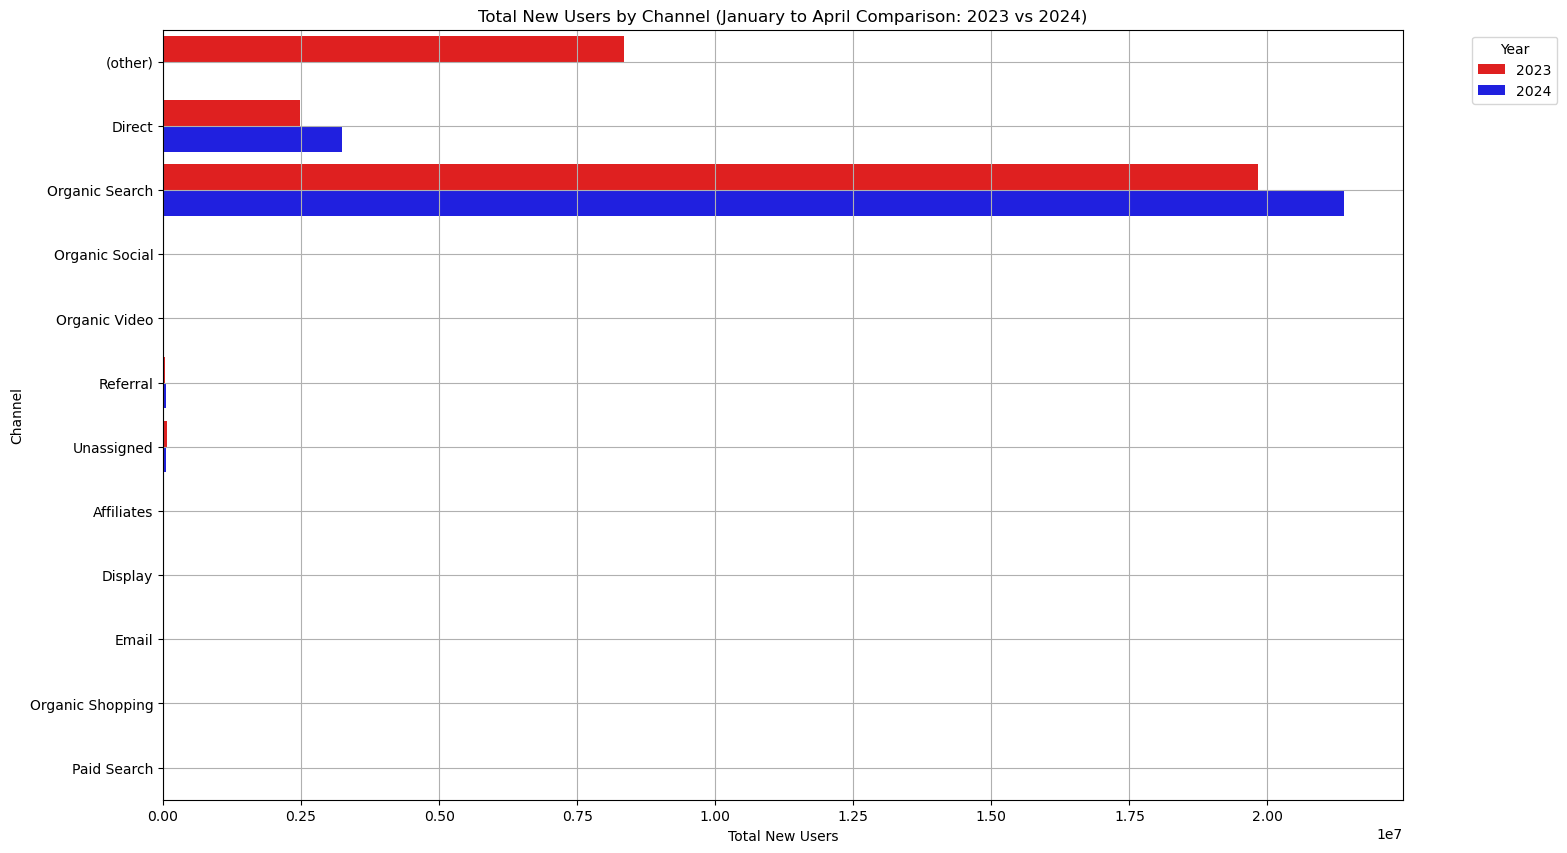

In [75]:


# Filter data for the first four months (January to April) for 2023 and 2024
data_jan_apr_2023 = traffic_data[(traffic_data['date'].dt.year == 2023) & (traffic_data['date'].dt.month.isin([1, 2, 3, 4]))]
data_jan_apr_2024 = traffic_data[(traffic_data['date'].dt.year == 2024) & (traffic_data['date'].dt.month.isin([1, 2, 3, 4]))]

# Group by 'channel' and calculate the total new users for each channel in January to April for 2023 and 2024
channel_new_users_jan_apr_2023 = data_jan_apr_2023.groupby('channel')['new_users'].sum().reset_index()
channel_new_users_jan_apr_2024 = data_jan_apr_2024.groupby('channel')['new_users'].sum().reset_index()

# Add a 'year' column for distinction
channel_new_users_jan_apr_2023['year'] = 2023
channel_new_users_jan_apr_2024['year'] = 2024

# Concatenate the dataframes for comparison
channel_new_users_jan_apr = pd.concat([channel_new_users_jan_apr_2023, channel_new_users_jan_apr_2024])

# Rename the columns for clarity
channel_new_users_jan_apr.columns = ['channel', 'new_users', 'year']

# Plot the comparison using seaborn
plt.figure(figsize=(16, 10))
sns.barplot(x='new_users', y='channel', hue='year', data=channel_new_users_jan_apr, palette={2023: 'red', 2024: 'blue'})
plt.title('Total New Users by Channel (January to April Comparison: 2023 vs 2024)')
plt.xlabel('Total New Users')
plt.ylabel('Channel')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


posx and posy should be finite values
posx and posy should be finite values


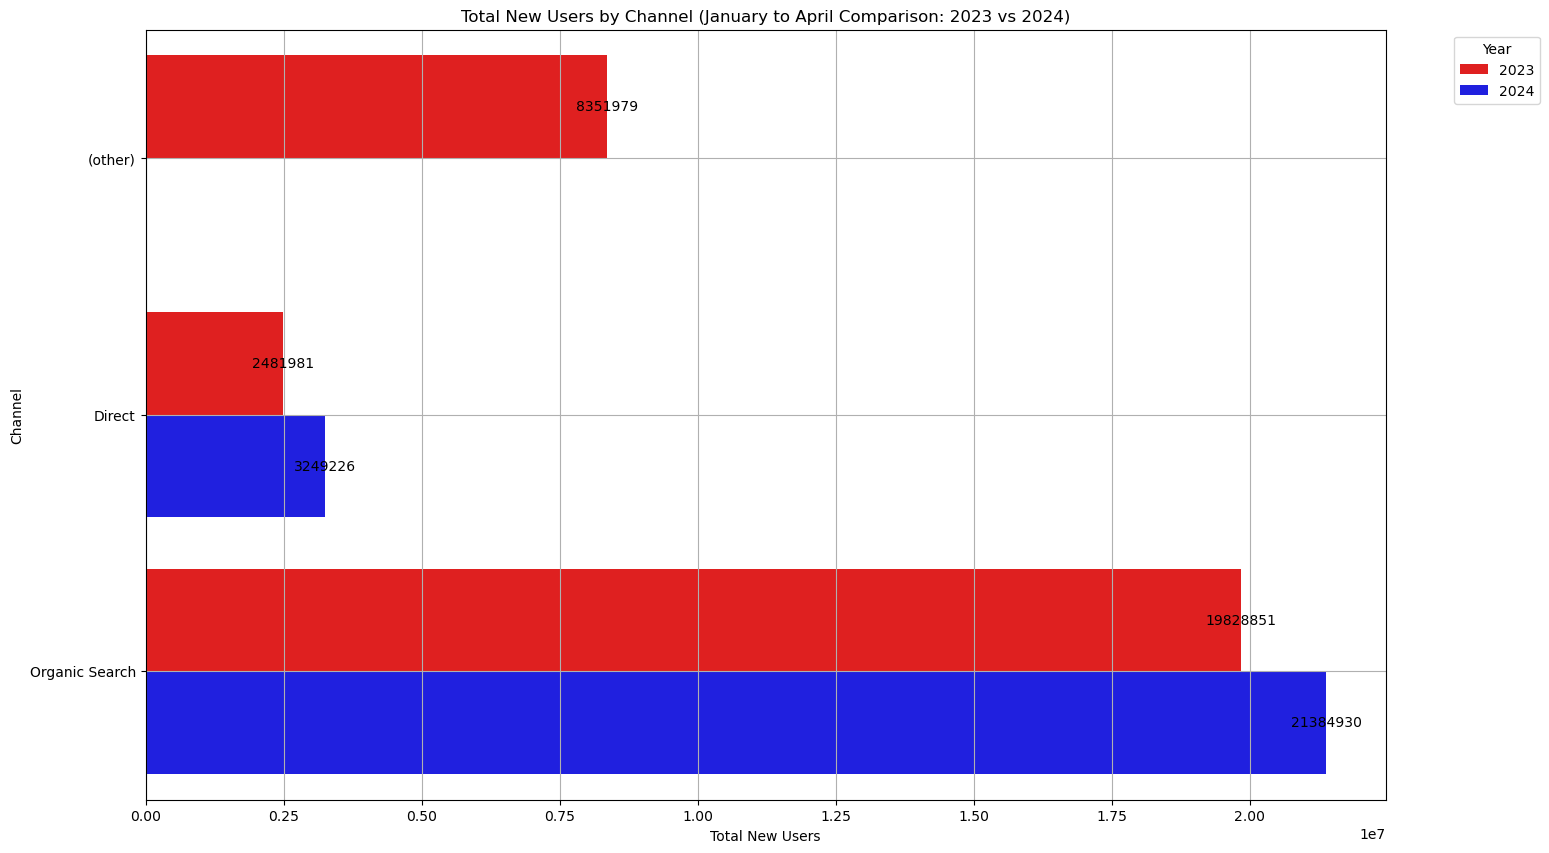

In [76]:


# Filter data for the first four months (January to April) for 2023 and 2024
data_jan_apr_2023 = traffic_data[(traffic_data['date'].dt.year == 2023) & (traffic_data['date'].dt.month.isin([1, 2, 3, 4]))]
data_jan_apr_2024 = traffic_data[(traffic_data['date'].dt.year == 2024) & (traffic_data['date'].dt.month.isin([1, 2, 3, 4]))]

# Group by 'channel' and calculate the total new users for each channel in January to April for 2023 and 2024
channel_new_users_jan_apr_2023 = data_jan_apr_2023.groupby('channel')['new_users'].sum().reset_index()
channel_new_users_jan_apr_2024 = data_jan_apr_2024.groupby('channel')['new_users'].sum().reset_index()

# Add a 'year' column for distinction
channel_new_users_jan_apr_2023['year'] = 2023
channel_new_users_jan_apr_2024['year'] = 2024

# Concatenate the dataframes for comparison
channel_new_users_jan_apr = pd.concat([channel_new_users_jan_apr_2023, channel_new_users_jan_apr_2024])

# Filter for 'Organic Search', 'Direct', and 'Other' channels
specified_channels = ["Organic Search", "Direct", "(other)"]

# Filter the data for the specified channels
filtered_channels = channel_new_users_jan_apr[channel_new_users_jan_apr['channel'].isin(specified_channels)]

# Plot the comparison using seaborn
plt.figure(figsize=(16, 10))
barplot = sns.barplot(x='new_users', y='channel', hue='year', data=filtered_channels, palette={2023: 'red', 2024: 'blue'})

# Add the number of new users at the end of each bar
for p in barplot.patches:
    width = p.get_width()
    plt.text(width + 3, p.get_y() + p.get_height() / 2, '{:1.0f}'.format(width), ha='center', va='center')

plt.title('Total New Users by Channel (January to April Comparison: 2023 vs 2024)')
plt.xlabel('Total New Users')
plt.ylabel('Channel')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


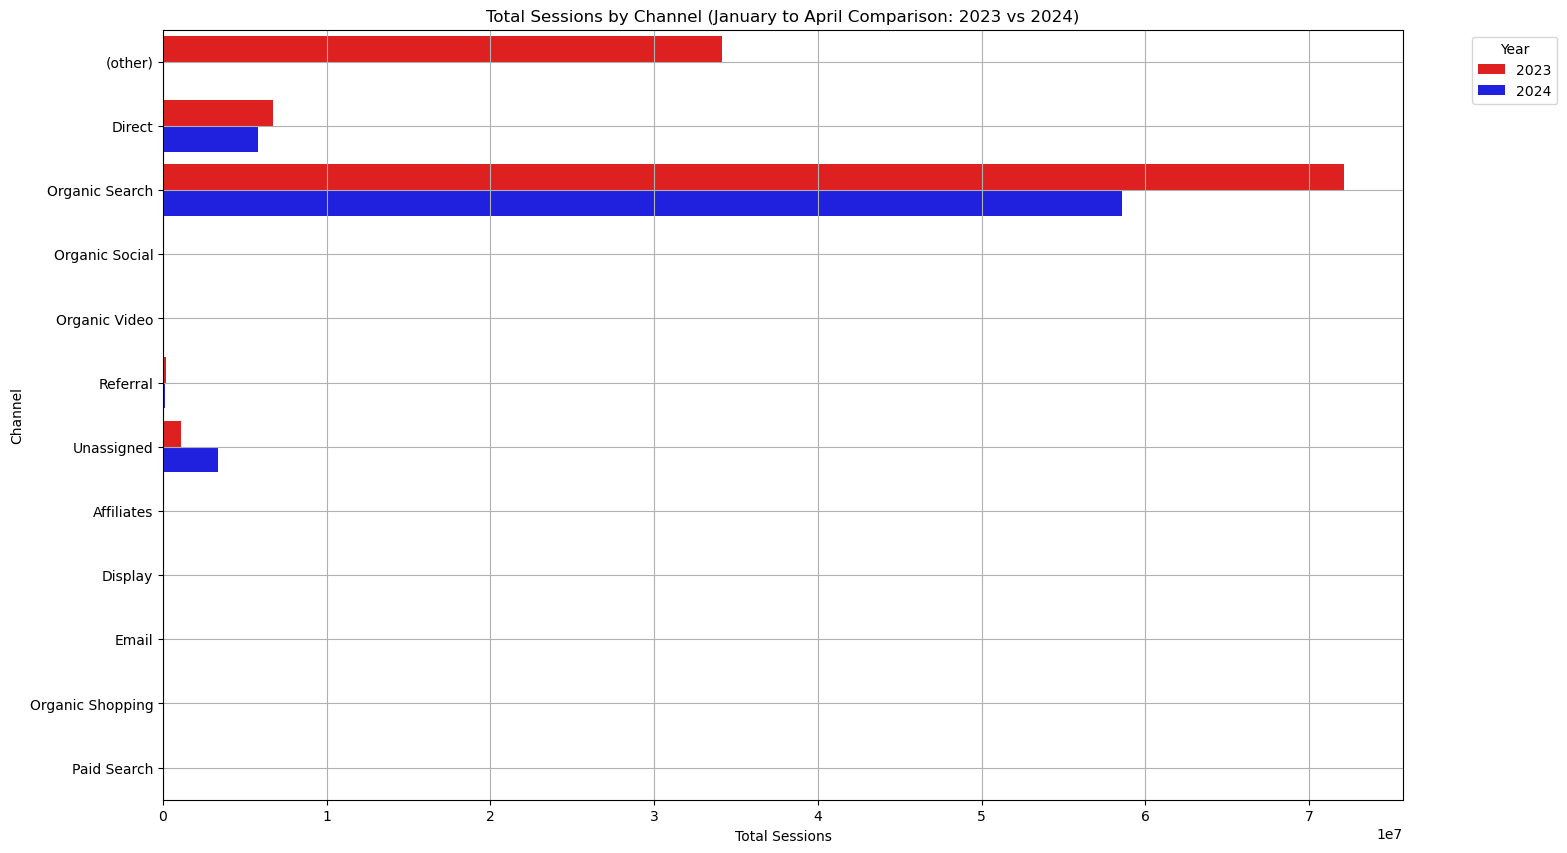

In [77]:

# Filter data for the first four months (January to April) for 2023 and 2024
data_jan_apr_2023 = traffic_data[(traffic_data['date'].dt.year == 2023) & (traffic_data['date'].dt.month.isin([1, 2, 3, 4]))]
data_jan_apr_2024 = traffic_data[(traffic_data['date'].dt.year == 2024) & (traffic_data['date'].dt.month.isin([1, 2, 3, 4]))]

# Group by 'channel' and calculate the total sessions for each channel in January to April for 2023 and 2024
channel_sessions_jan_apr_2023 = data_jan_apr_2023.groupby('channel')['sessions'].sum().reset_index()
channel_sessions_jan_apr_2024 = data_jan_apr_2024.groupby('channel')['sessions'].sum().reset_index()

# Add a 'year' column for distinction
channel_sessions_jan_apr_2023['year'] = 2023
channel_sessions_jan_apr_2024['year'] = 2024

# Concatenate the dataframes for comparison
channel_sessions_jan_apr = pd.concat([channel_sessions_jan_apr_2023, channel_sessions_jan_apr_2024])

# Rename the columns for clarity
channel_sessions_jan_apr.columns = ['channel', 'sessions', 'year']

# Plot the comparison using seaborn
plt.figure(figsize=(16, 10))
sns.barplot(x='sessions', y='channel', hue='year', data=channel_sessions_jan_apr, palette={2023: 'red', 2024: 'blue'})
plt.title('Total Sessions by Channel (January to April Comparison: 2023 vs 2024)')
plt.xlabel('Total Sessions')
plt.ylabel('Channel')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_15260\2636096376.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  specified_channel_sessions_jan_apr_2023['year'] = 2023
C:\Users\User\AppData\Local\Temp\ipykernel_15260\2636096376.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  specified_channel_sessions_jan_apr_2024['year'] = 2024


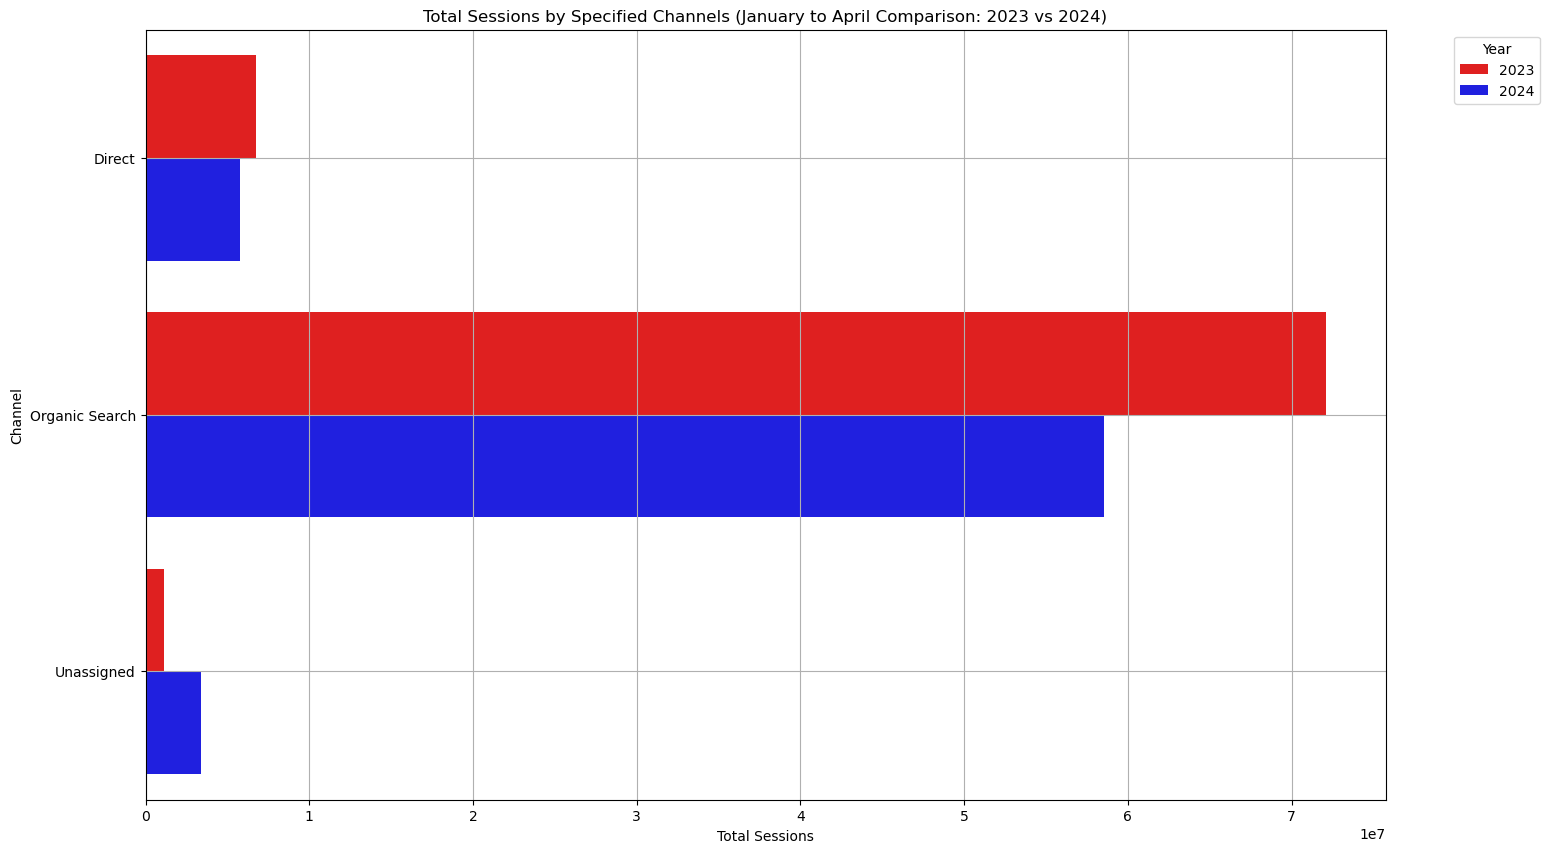

In [78]:

# Filter data for the first four months (January to April) for 2023 and 2024
data_jan_apr_2023 = traffic_data[(traffic_data['date'].dt.year == 2023) & (traffic_data['date'].dt.month.isin([1, 2, 3, 4]))]
data_jan_apr_2024 = traffic_data[(traffic_data['date'].dt.year == 2024) & (traffic_data['date'].dt.month.isin([1, 2, 3, 4]))]

# Group by 'channel' and calculate the total sessions for each channel in January to April for 2023 and 2024
channel_sessions_jan_apr_2023 = data_jan_apr_2023.groupby('channel')['sessions'].sum().reset_index()
channel_sessions_jan_apr_2024 = data_jan_apr_2024.groupby('channel')['sessions'].sum().reset_index()

# Filter the data for the specified channels: Direct, Organic Search, and Unassigned
specified_channels = ['Direct', 'Organic Search', 'Unassigned']

# Filter the data for the specified channels in January to April for 2023 and 2024
specified_channel_sessions_jan_apr_2023 = channel_sessions_jan_apr_2023[channel_sessions_jan_apr_2023['channel'].isin(specified_channels)]
specified_channel_sessions_jan_apr_2024 = channel_sessions_jan_apr_2024[channel_sessions_jan_apr_2024['channel'].isin(specified_channels)]

# Add a 'year' column for distinction
specified_channel_sessions_jan_apr_2023['year'] = 2023
specified_channel_sessions_jan_apr_2024['year'] = 2024

# Concatenate the dataframes for comparison
specified_channel_sessions_jan_apr = pd.concat([specified_channel_sessions_jan_apr_2023, specified_channel_sessions_jan_apr_2024])

# Plot the comparison using seaborn
plt.figure(figsize=(16, 10))
sns.barplot(x='sessions', y='channel', hue='year', data=specified_channel_sessions_jan_apr, palette={2023: 'red', 2024: 'blue'})
plt.title('Total Sessions by Specified Channels (January to April Comparison: 2023 vs 2024)')
plt.xlabel('Total Sessions')
plt.ylabel('Channel')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


# Predictive Modeling - Clustering with K-meas

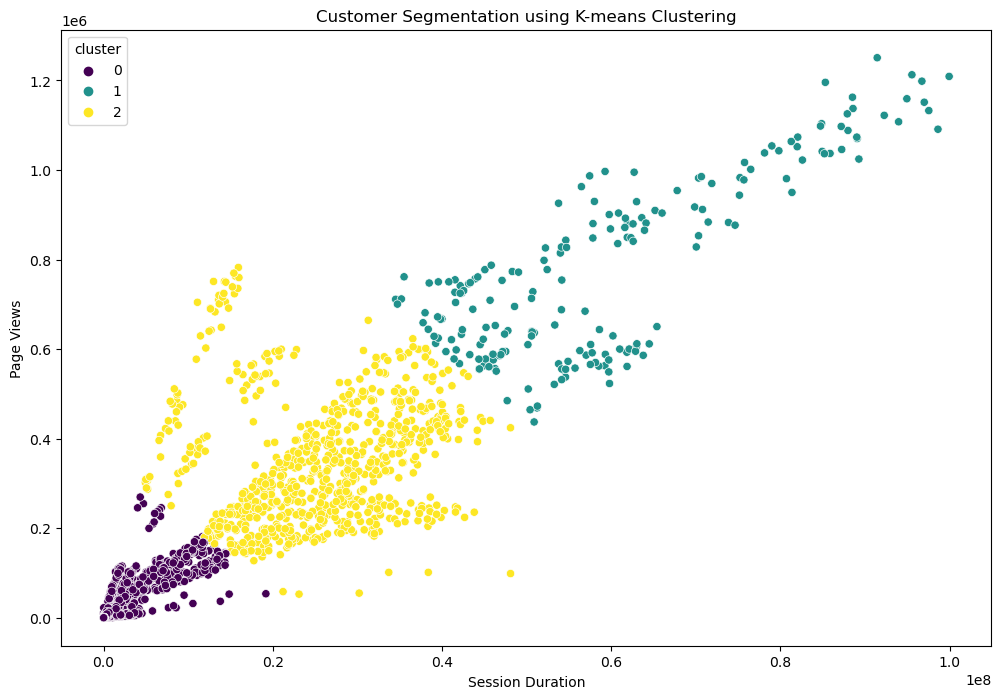

In [79]:


# Convert 'date' to datetime format
traffic_data['date'] = pd.to_datetime(traffic_data['date'])

# Feature selection: Let's use 'session_duration' and 'page_views'
features = traffic_data[['session_duration', 'page_views']].copy()

# Handle missing values
features = features.dropna()

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Assuming 3 clusters
clusters = kmeans.fit_predict(features_scaled)

# Add the cluster labels to the original dataframe
traffic_data['cluster'] = clusters

# Plot the clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(x='session_duration', y='page_views', hue='cluster', data=traffic_data, palette='viridis')
plt.title('Customer Segmentation using K-means Clustering')
plt.xlabel('Session Duration')
plt.ylabel('Page Views')
plt.show()


## Predicted modeling usnupervised (k-means)

In [80]:
# Convert 'date' to datetime format
traffic_data['date'] = pd.to_datetime(traffic_data['date'])

# Feature selection: Let's use 'session_duration', 'page_views', and 'new_users'
features = traffic_data[['session_duration', 'page_views', 'new_users']].copy()

# Handle missing values
features = features.dropna()

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

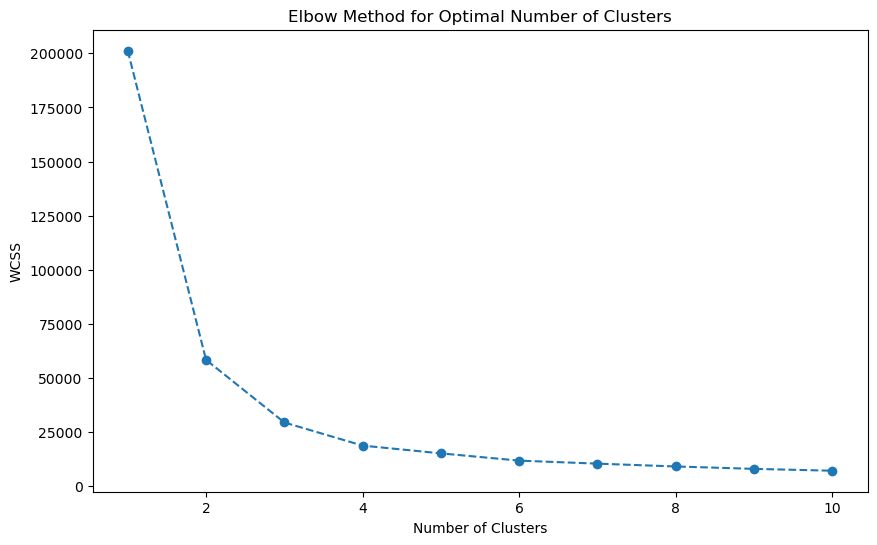

In [81]:
# Use the Elbow Method to find the optimal number of clusters
wcss = []  # Within-cluster sum of squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(features_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

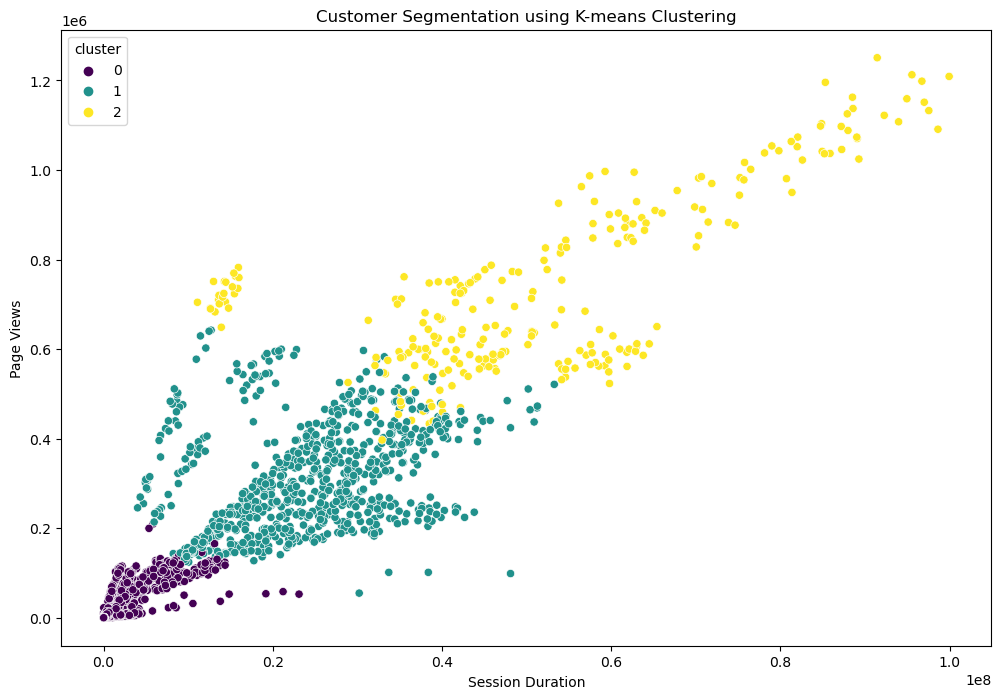

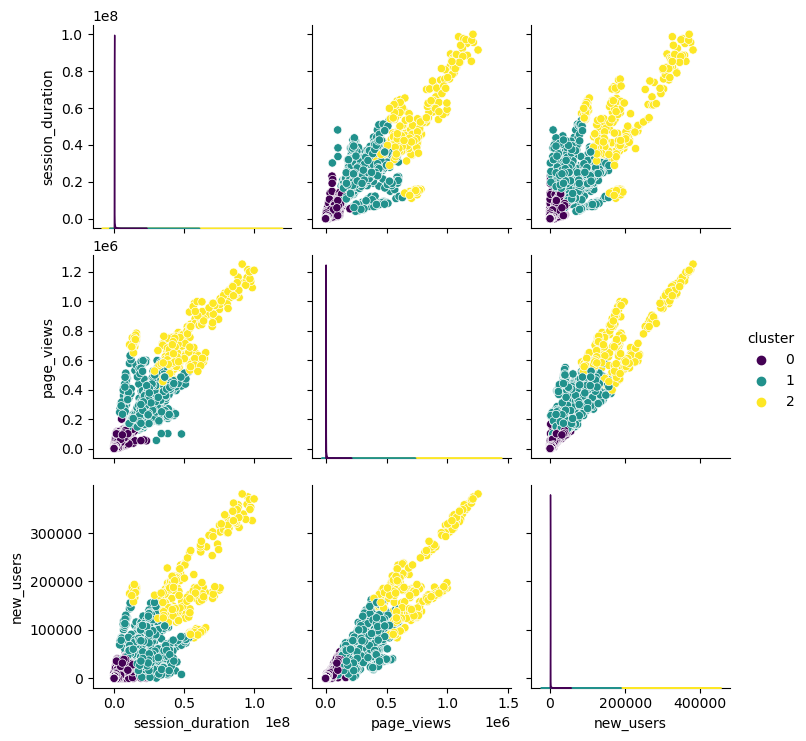

In [82]:
# Perform K-means clustering with the optimal number of clusters
optimal_clusters = 3  # Replace with the number obtained from the Elbow Method
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters = kmeans.fit_predict(features_scaled)

# Add the cluster labels to the original dataframe
traffic_data['cluster'] = clusters

# Plot the clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(x='session_duration', y='page_views', hue='cluster', data=traffic_data, palette='viridis')
plt.title('Customer Segmentation using K-means Clustering')
plt.xlabel('Session Duration')
plt.ylabel('Page Views')
plt.show()

# Plot clusters using seaborn pairplot to visualize in all dimensions
sns.pairplot(traffic_data[['session_duration', 'page_views', 'new_users', 'cluster']], hue='cluster', palette='viridis')
plt.show()


# Cluster 0: 
High Session Duration and High Page Views
Characteristics:

Users in this cluster spend a lot of time on the site and view many pages per session.
Likely highly engaged users.
Recommendations:

Premium Content:
Offer premium content or membership options to these users.
Provide exclusive access to new features or content before it's available to others.
Personalization:
Use personalized recommendations based on their browsing history to keep them engaged.
Send personalized emails with content or product suggestions.
Retention Campaigns:
Implement loyalty programs or rewards to retain these high-value users.
Offer special discounts or promotions to encourage repeat visits.

# Cluster 1:

Moderate Session Duration and Page Views
Characteristics:

Users in this cluster have moderate engagement with the site.
They spend a decent amount of time and view a fair number of pages per session.
Recommendations:

Content Optimization:
Optimize content to increase engagement by highlighting popular or trending topics.
Use A/B testing to find the most engaging content formats for this group.
Engagement Campaigns:
Use push notifications or email campaigns to bring these users back to the site.
Encourage them to sign up for newsletters to stay updated with new content.
Interactive Features:
Introduce interactive features like polls, quizzes, or live chats to boost engagement.
Provide social sharing options to increase interaction and attract more users.

# Cluster 2:

Low Session Duration and Page Views
Characteristics:

Users in this cluster spend less time on the site and view fewer pages.
Likely to be less engaged or new visitors.
Recommendations:

Onboarding Experience:
Improve the onboarding experience for new users to help them understand the site’s value.
Use welcome emails or guides to introduce them to key features and content.
Targeted Content:
Identify the reasons for low engagement and target these users with specific content that meets their needs.
Use analytics to understand what kind of content might interest them and create targeted campaigns.
Simplify Navigation:
Simplify the site navigation to help users find relevant content quickly.
Use clear call-to-actions to guide them through the site.
General Recommendations:
Feedback Collection:
Collect feedback from users in each cluster to understand their needs and preferences better.
Use surveys or feedback forms to gather insights.
Regular Analysis:
Regularly analyze the performance of each cluster and adjust strategies as needed.
Monitor changes in user behavior and adapt marketing strategies accordingly.

# Cross-Cluster Strategies:
Implement strategies that can transition users from one cluster to another (e.g., from low to moderate engagement).
Use personalized messaging to encourage less engaged users to become more active.
Conclusion:
By understanding the distinct characteristics and behaviors of each user cluster, you can implement targeted strategies to enhance user engagement, retention, and satisfaction. Tailoring your approach to the specific needs and preferences of each segment will help you optimize your efforts and achieve better results.